# <span style="color:black">Capstone Project: Facial Emotion Detection</span>
<span style="color:black">Jeff Stearns - October 2023</span>

# <span style="color:navy">Executive Summary</span>

Emotion AI, also known as artificial emotional intelligence, is a subset of artificial intelligence dealing with the detection and replication of human emotion by machines. The successful creation of this "artificial empathy" hinges on a computer's ability to analyze, among other things, human text, speech, and facial expressions. In support of these efforts, this project leverages the power of convolutional neural networks (CNN) to create a computer vision model capable of accurately performing multi-class classification on images containing one of four facial expressions: happy, sad, neutral, and surprise.

Data provided for this project includes over 20,000 grayscale images split into training (75%), validation (24.5%), and test (0.5%) datasets, and further divided into the aforementioned classes. At the outset of the project, a visual analysis of the data is undertaken and a slight imbalance is noted in the class distribution, with 'surprise' images making up a smaller percentage of total images when compared to 'happy,' 'sad,' and 'neutral' images. The unique characteristics of each class are discussed (e.g., images labeled as 'surprise' tend to contain faces with wide open mouths and eyes), including a breakdown of average pixel value by class.

Following the data visualization and analysis phase of the project, nine CNNs are developed, ranging from simple grayscale models to complex transfer learning architectures comprised of hundreds of layers and tens of millions of parameters. Basic models are shown to be lacking the required amount of complexity to properly fit the data, while the transfer learning models (VGG16, ResNet v2, and EfficientNet) are shown to be too complex for the amount and type of data provided for this project. The unsatisfactory performance of the basic and transfer learning models necessitates the development of an alternative model capable of fitting the data and achieving acceptable levels of accuracy while maintaining a high level of generalizability. The proposed model, with four convolutional blocks and 1.8 million parameters, displays high accuracy (75% on training, validation, and test data) when compared to human performance (±65%) on similar data, and avoids overfitting the training data, which can be difficult to achieve with CNNs.

The deployability of this model depends entirely on its intended use. With an accuracy of 75%, deployment in a marketing or gaming setting is perfectly reasonable, assuming consent has been granted, and the handling of highly personal data is done in an ethical, transparent manner with data privacy coming before profit. However, deployment in circumstances where the output from this model could cause serious material damage to an individual (e.g., hiring decisions, law enforcement, evidence in a court of law, etc.) should be avoided. While computer vision models can become quite skilled at classifying human facial expressions (particularly if they are trained on over-emoting/exaggerated images), it is important to note that a connection between those expressions and any underlying emotion is not a hard scientific fact. For example, a smiling person may not always be happy (e.g., they could be uncomfortable or polite), a crying person may not always be sad (e.g., they could be crying tears of joy), and someone who is surprised may be experiencing compound emotions (e.g., happily surprised or sadly surprised).

There is certainly scope to improve the proposed model, including the ethical sourcing of additional, diverse training images, and additional data augmentation on top of what is already performed during the development of the proposed model. In certain scenarios, as indicated above, model deployment could proceed with 75% accuracy, and continued improvement could be pursued by the business/organization/government as time and funding allows. Before model deployment, a set of guiding ethical principles should be developed and adhered to throughout the data collection, analysis, and (possibly) storage phase. Stakeholders must ensure transparency throughout all stages of the computer vision life cycle, while monitoring the overall development of Emotion AI technology and anticipating future regulatory action, which appears likely.


## **Problem Definition**

**Context:**<br>
How do humans communicate with one another? While spoken and written communication may immediately come to mind, research by Dr. Albert Mehrabian has found that over 50% of communication is conveyed through body language, including facial expressions. In face-to-face conversation, body language, it turns out, plays a larger role in how our message is interpreted than both the words we choose, and the tone with which we deliver them. Our expression is a powerful window into our true feelings, and as such, it can be used as a highly-effective proxy for sentiment, particularly in the absence of written or spoken communication. <br>

Emotion AI (artificial emotional intelligence, or affective computing), attempts to leverage this proxy for sentiment by detecting and processing facial expression (through neural networks) in an effort to successfully interpret human emotion and respond appropriately. Developing models that can accurately detect facial emotion is therefore an important driver of  advancement in the realm of artificial intelligence and emotionally intelligent machines. The ability to successfully extract sentiment from images and video is also a powerful tool for businesses looking to conjure insights from the troves of unstructured data they have accumulated in recent years, or even to extract second-by-second customer responses to advertisements, store layouts, customer/user experience, etc.<br>

**Objective:**<br>
The objective of this project is to utilize deep learning techniques, including convolutional neural networks, to create a computer vision model that can accurately detect and interpret facial emotions. This model should be capable of performing multi-class classification on images containing one of four facial expressions: happy, sad, neutral, and surprise. <br>

**Key Questions:**<br>
* Do we have the data necessary to develop our models, and is it of good enough quality and quantity?
* What is the best type of machine learning model to achieve our objective?
* What do we consider 'success' when it comes to model performance?
* How do different models compare to one another given this definition of success?
* What are the most important insights that can be drawn from this project upon its conclusion?
* What is the final proposed model and is it good enough for deployment?




## **About the Dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>

## **Importing the Libraries**

In [ ]:
import zipfile                        # Used to unzip the data

import numpy as np                    # Mathematical functions, arrays, etc.
import pandas as pd                   # Data manipulation and analysis
import os                             # Misc operating system interfaces
import h5py                           # Read and write h5py files
import random


import matplotlib.pyplot as plt       # A library for data visualization
from matplotlib import image as mpimg # Used to show images from filepath
import seaborn as sns                 # An advanced library for data visualization
from PIL import Image                 # Image processing
import cv2                            # Image processing

# Importing Deep Learning Libraries, layers, models, optimizers, etc
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, SpatialDropout2D, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU, GaussianNoise
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta
from tensorflow.keras import regularizers
from keras.regularizers import l2
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.applications as ap
from tensorflow.keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import backend

# Reproducibility within TensorFlow
#import fwr13y.d9m.tensorflow as tf_determinism
#tf_determinism.enable_determinism()
#tf.config.experimental.enable_op_determinism

from tqdm import tqdm                 # Generates progress bars

# Predictive data analysis tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Needed to silence tensorflow messages while running locally
#from silence_tensorflow import silence_tensorflow
#silence_tensorflow()


In [ ]:
# Fixing the seed for random number generators to ensure reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Ensuring reproducibility using GPU with TensorFlow
#os.environ['TF_DETERMINISTIC_OPS'] = '1'

### **Loading and Unzipping the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Path to Facial Library ZIP File in Google drive
face_file = '/content/drive/MyDrive/MITAppliedDataScience/FacialRecognition/Facial_emotion_images.zip'

# Extracting image files from the zip file
with zipfile.ZipFile(face_file, "r") as zip_ref:
    zip_ref.extractall()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir_train = "Facial_emotion_images/train/"                     # Path of training data after unzipping
dir_validation = "Facial_emotion_images/validation/"           # Path of validation data after unzipping
dir_test = "Facial_emotion_images/test/"                       # Path of test data after unzipping
img_size = 48                                                  # Defining the size of the image as 48 pixels


## **Visualizing our Classes**


In [ ]:
# Display first 16 images from the specified training folder

def get_image(emotion):
    train_emotion = dir_train + emotion + "/"
    plt.figure(figsize = (10, 10))

    for i in range(1, 17):
        plt.subplot(4, 4, i)
        img = load_img(train_emotion +
                    os.listdir(train_emotion)[i],
                    target_size = (img_size, img_size))
        plt.imshow(img)

    plt.show()

### **Happy**

First 16 training images labeled as 'Happy':


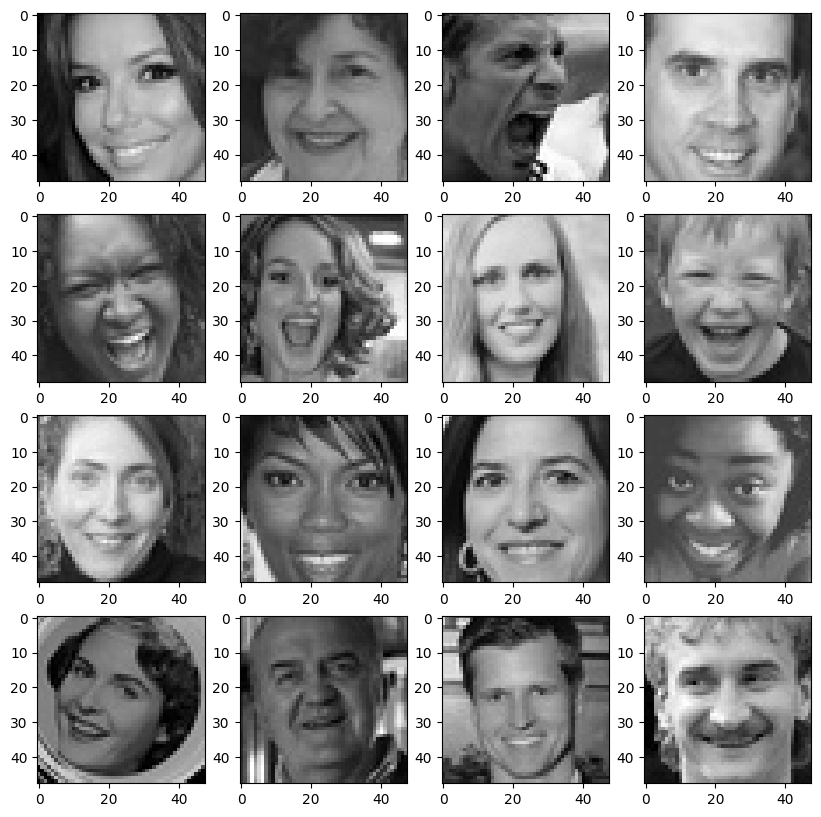

In [ ]:
print("First 16 training images labeled as 'Happy':")
get_image("happy")

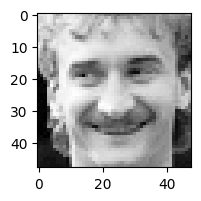

In [ ]:
# An example image pulled from the images above

img_x = os.listdir("Facial_emotion_images/train/happy/")[16]
img_happy_16 = mpimg.imread("Facial_emotion_images/train/happy/"+img_x)
plt.figure(figsize = (2, 2))
plt.imshow(img_happy_16, cmap='Greys_r')
plt.show()

**Observations and Insights: Happy**<br>
* In most images, the person is smiling. Some smiles are with an open mouth with teeth visible, and some are with closed lips. Our models will need to learn both types of smiles.
* Image brightness varies considerably and will need to be addressed with data augmentation.
* The ages of the people vary from very young to old.
* In some images, people are wearing eyeglasses or hats, eating food, or are partially covering their face with their hands. Some images contain watermarks.
* Some images are head-on while some are sideways. We will address this via data augmentation (rotating and/or flipping images).
* Images are cropped differently and this will need to be addressed with data augmentation (zoom/crop).
* Some images do not contain a face (though not shown in the above 35). There is really nothing to do about this ... some of the test images also do not contain a face. As a result, some predictions by the final model will be based on incorrect data labeling.
* As highlighted by the image above, some images are of non-human faces. In this case, it appears to be a statue with exaggerated features.
* Some 'happy' images would clearly not be classified as 'happy' by a human being. This brings into question what accuracy really means. If the model correctly predicts an image labeled 'happy' as 'happy', should that be considered accurate if the person in the image is actually frowning and would be considered by a human being to be sad? In a high-stakes, real world situation we could potentially relabel images that have been incorrectly labeled, but in the context of this project, we have been advised to leave the training labels untouched.


### **Sad**

First 16 training images labeled as 'Sad':


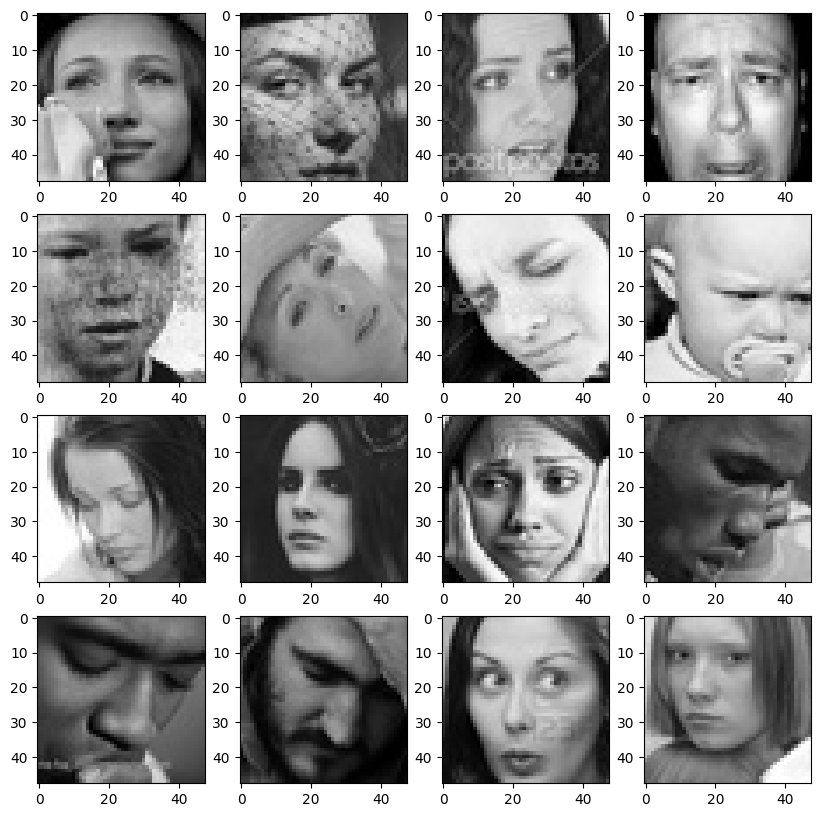

In [ ]:
print("First 16 training images labeled as 'Sad':")
get_image("sad")

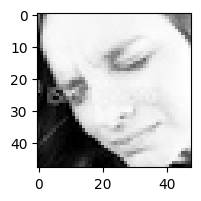

In [ ]:
# An example image pulled from the images above

img_x = os.listdir("Facial_emotion_images/train/sad/")[7]
img_sad_7 = mpimg.imread("Facial_emotion_images/train/sad/"+img_x)
plt.figure(figsize = (2, 2))
plt.imshow(img_sad_7, cmap='Greys_r')
plt.show()

**Observations and Insights: Sad**<br>
* In most images, the person is frowning. In many images, people have their eyes closed or are looking down.
* Compared to the 'happy' images, people labeled 'sad' seem more likely to have their mouths closed.
* Similar to the 'happy' images, image brightness varies considerably, as does age. Some images are head-on while others are sideways. Some people are covering their face with their hands. As with 'happy' images, 'sad' images are also cropped differently, while some also have watermarks.
* Some images do not contain a face (though not shown in the above 35).
* As highlighted by the image above, some images are labeled 'sad' but would probably not be classified as sad by a human being. The person above appears to be smiling, but an accurate prediction by one of our models would classify the image as 'sad'. This raises the same issue about accuracy mentioned earlier.
* At first glance, apart from the images that are clearly mislabeled, there appears to be enough difference between the 'happy' and 'sad' characteristics that an effective model should be able to tell them apart relatively easily.

### **Neutral**

First 16 training images labeled as 'Neutral':


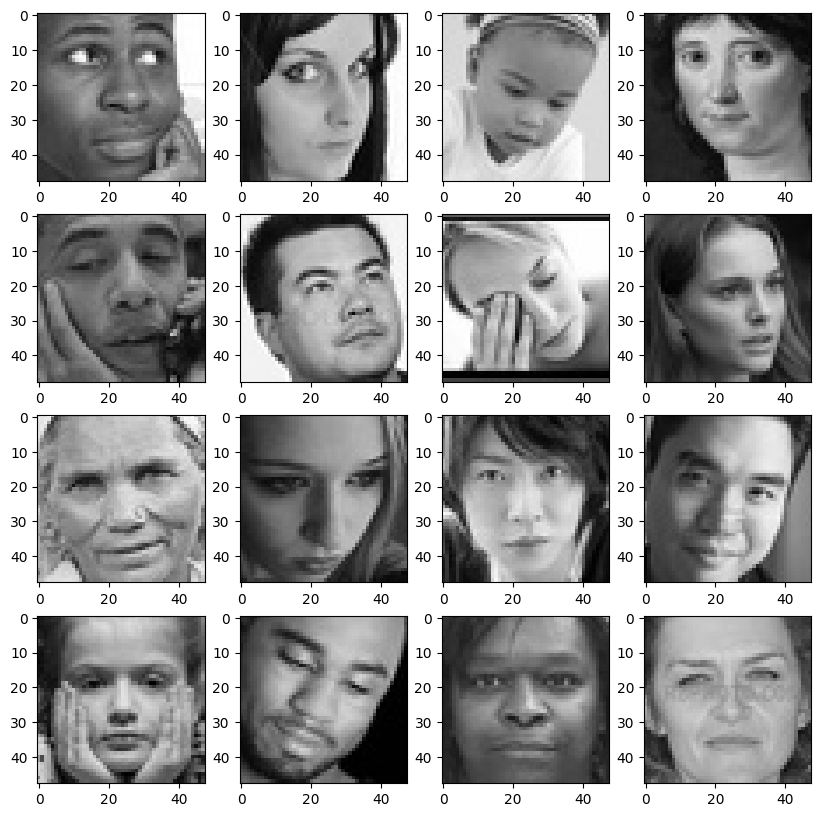

In [ ]:
print("First 16 training images labeled as 'Neutral':")
get_image("neutral")

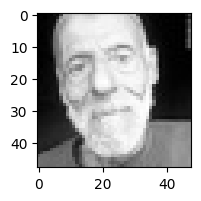

In [ ]:
# An example image pulled from the images above

img_x = os.listdir("Facial_emotion_images/train/neutral/")[26]
img_neutral_26 = mpimg.imread("Facial_emotion_images/train/neutral/"+img_x)
plt.figure(figsize = (2, 2))
plt.imshow(img_neutral_26, cmap='Greys_r')
plt.show()

**Observations and Insights: Neutral**<br>
* At first glance, this seems to be the most difficult label to accurately predict. While 'happy' and 'sad' images appear different enough that a model should be able to tell the difference, 'neutral' faces are in between 'happy' and 'sad', and consequently similar to both.
* Similar to the other classes discussed above, differences in brightness, age, zoom, hands covering faces, etc. are apparent in the 'neutral' images as well.
* As highlighted in the image above, some images are simply mistakes and do not contain any faces at all.
* These neutral images seem more difficult for a human being to correctly classify. Some people appear to be slightly smiling, while others appear to be slightly frowning. This begs the question, where are the lines between happy/neutral and sad/neutral? Neutral images do appear to be more similar to sad images, so it is possible that our models will confuse the two classes.


### **Surprise**

First 16 training images labeled as 'Surprise':


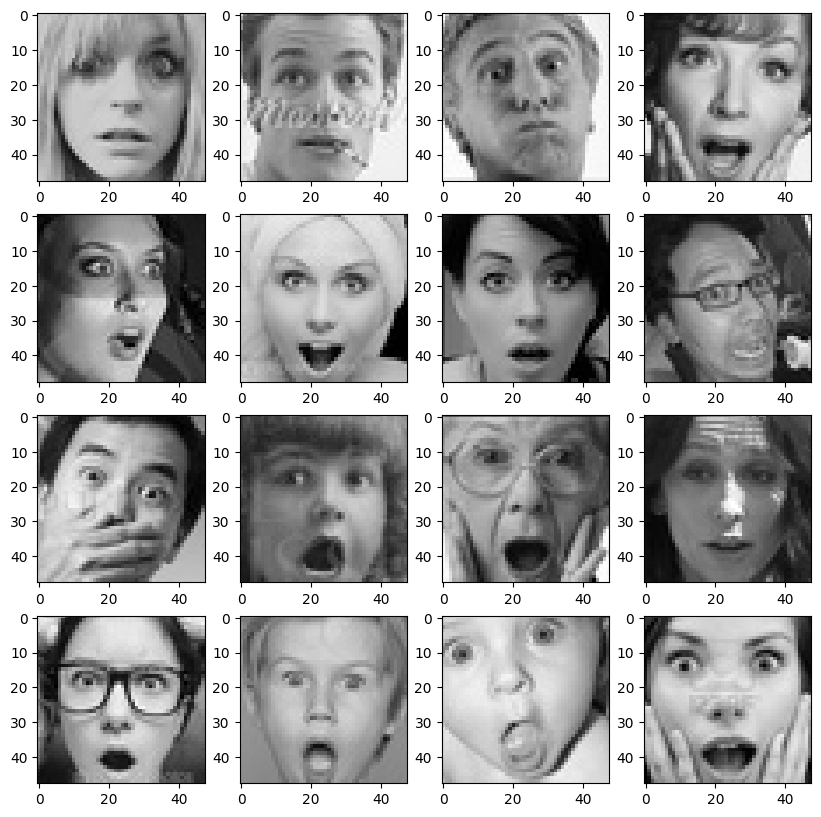

In [ ]:
print("First 16 training images labeled as 'Surprise':")
get_image("surprise")

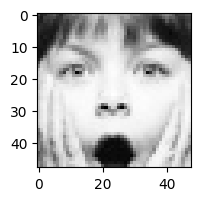

In [ ]:
# An example image pulled from the images above

img_x = os.listdir("Facial_emotion_images/train/surprise/")[17]
img_surprise_34 = mpimg.imread("Facial_emotion_images/train/surprise/"+img_x)
plt.figure(figsize = (2, 2))
plt.imshow(img_surprise_34, cmap='Greys_r')
plt.show()

**Observations and Insights: Surprise**<br>
* The most unique characteristics of the 'surprise' images are open mouths and big, open eyes. These seem like features that a successful model should be able to identify and accurately classify. There is a big difference between 'surprise' images and 'neutral' images, for example. It is possible, however, that the open mouth of a 'happy' smile and the open mouth of a 'surprise' image could be difficult for a model to distinguish between.
* As with the above classes, brightness, crop, age, etc. vary between images. Hands are often covering faces. Some photos are head-on while others face sideways.
* The above image is an example with a very light pixel value, as opposed to one of the much darker images. The person in the image has the classic open mouth and wide open eyes. The image also contains a watermark.
* Some images do not contain a face (though not shown in the above 35).


**Overall Insights from Visualization of Classes:**<br>
* All images are in grayscale (black/white) and image size is 48 x 48 pixels. We will need to rescale pixel values by dividing by 255 so pixel values are normalized between 0 and 1. This will allow our models to train faster and help to stabilize gradient descent.
* Some classes have very different characteristics (happy/sad) while other classes are more similar (sad/neutral) and could be challenging for a model to accurately classify.
* There is a wide range of differences with respect to image brightness, age of person, zoom/crop of image, orientation of the face, objects/hands covering the face, images not containing any face at all, etc. Data augmentation will need to be taken into consideration, and this will be handled when the Data Loaders are created below.
* Visualizing the images in this way raises an important question: what do we consider an accurate model prediction for an image that is clearly mislabeled? If a person is smiling but labeled as 'sad', and the model accurately predicts 'sad', is that really 'accurate' since a human being would classify the image as 'happy'? If the test data set is large, it would be difficult to go through each image individually to check accuracy (which would also defeat the purpose of creating a computer vision model in the first place), so we will have to live with 'accurate' model predictions that may not be truly accurate. Pondering questions like this lead one to believe that a model can really only be as good as the data it is trained on.


## **Checking Distribution of Classes**

In [ ]:
# Getting the count of images in each training folder and saving to variables

train_happy = len(os.listdir(dir_train + "happy/"))
train_sad = len(os.listdir(dir_train + "sad/"))
train_neutral = len(os.listdir(dir_train + "neutral/"))
train_surprised = len(os.listdir(dir_train + "surprise/"))

# Creating a Pandas series called "train_series" and converting to Pandas dataframe called "train_df"
# in order to display the table below. The dataframe will also contribute to bar charts farther below.

train_series = pd.Series({'Happy': train_happy, 'Sad': train_sad, 'Neutral': train_neutral,
                          'Surprised': train_surprised})
train_df = pd.DataFrame(train_series, columns = ['Total Training Images'])
train_df["Percentage"] = round((train_df["Total Training Images"] / train_df["Total Training Images"].sum())*100, 1)
train_df.index.name='Emotions'

print("The distribution of classes within the training data:")
train_df

The distribution of classes within the training data:


,Total Training Images,Percentage
Emotions,,
Happy,3976,26.3
Sad,3982,26.4
Neutral,3978,26.3
Surprised,3173,21.0


In [ ]:
train_df.sum()

Total Training Images    15109.0
Percentage                 100.0
dtype: float64

**Observations: Training Images**<br>
* There are 15,109 training images in total.
* Happy, sad, and neutral images make up roughly the same share of total training images (26%), while surprise images make up a smaller share (21%). At this stage it is important to note the relatively small imbalance, though the ratio does not seem skewed enough to warrant future manipulation in terms of weights, etc.
* The insight made above, that surprise images seem to be some of the most unique in terms of characteristics (big open mouth, big open eyes), may actually help us overcome the relatively minor imbalance. There are fewer surprise images, but they may be easier to classify.



In [ ]:
# Getting count of images in each validation folder and saving to variables

val_happy = len(os.listdir(dir_validation + "happy/"))
val_sad = len(os.listdir(dir_validation + "sad/"))
val_neutral = len(os.listdir(dir_validation + "neutral/"))
val_surprised = len(os.listdir(dir_validation + "surprise/"))

# Creating a Pandas series called "val_series" and converting to Pandas dataframe called "val_df"
# in order to display the table below. The dataframe will also contribute to bar charts farther below.

val_series = pd.Series({'Happy': val_happy, 'Sad': val_sad, 'Neutral': val_neutral,
                        'Surprised': val_surprised})
val_df = pd.DataFrame(val_series, columns = ['Total Validation Images'])
val_df["Percentage"] = round((val_df["Total Validation Images"] / val_df["Total Validation Images"].sum())*100, 1)
val_df.index.name='Emotions'

print("The distribution of classes within the validation data:")
val_df

The distribution of classes within the validation data:


,Total Validation Images,Percentage
Emotions,,
Happy,1825,36.7
Sad,1139,22.9
Neutral,1216,24.4
Surprised,797,16.0


In [ ]:
val_df.sum()

Total Validation Images    4977.0
Percentage                  100.0
dtype: float64

**Observations: Validation Images**<br>
* There are 4,977 validation images in total.
* The distribution across classes is much more imbalanced. Happy images make up almost 37% of total validation images, while surprise images make up only 16%. As the training images and validation images are already split and provided as is, it is not a simple matter of randomly splitting training data with a train/test split. We are stuck with the imbalance.
* One solution to address the imbalance could be to cap the other classes at the level of the surprise class, but that would throw away a huge portion of our already small data set.
* As mentioned above, we can surmise that surprise images are easier to classify because of their unique characteristics, and we will see if that is enough to offset the relatively smaller sample size with which to train and validate.


In [ ]:
# Getting count of images in each test folder and saving to variables

test_happy = len(os.listdir(dir_test + "happy/"))
test_sad = len(os.listdir(dir_test + "sad/"))
test_neutral = len(os.listdir(dir_test + "neutral/"))
test_surprised = len(os.listdir(dir_test + "surprise/"))

# Creating a Pandas series called "test_series" and converting to Pandas dataframe called "test_df"
# in order to display the table below. The dataframe will also contribute to bar charts farther below.

test_series = pd.Series({'Happy': test_happy, 'Sad': test_sad, 'Neutral': test_neutral,
                        'Surprised': test_surprised})
test_df = pd.DataFrame(test_series, columns = ['Total Test Images'])
test_df["Percentage"] = round((test_df["Total Test Images"] / test_df["Total Test Images"].sum())*100, 1)
test_df.index.name='Emotions'

print("The distribution of classes within the validation data:")
test_df

The distribution of classes within the validation data:


,Total Test Images,Percentage
Emotions,,
Happy,32,25.0
Sad,32,25.0
Neutral,32,25.0
Surprised,32,25.0


In [ ]:
test_df.sum()

Total Test Images    128.0
Percentage           100.0
dtype: float64

**Observations: Test Images**<br>
* There are 128 test images in total, evenly divided between all four classes.
* This even distribution will make interpretation of the final confusion matrix very straightforward.

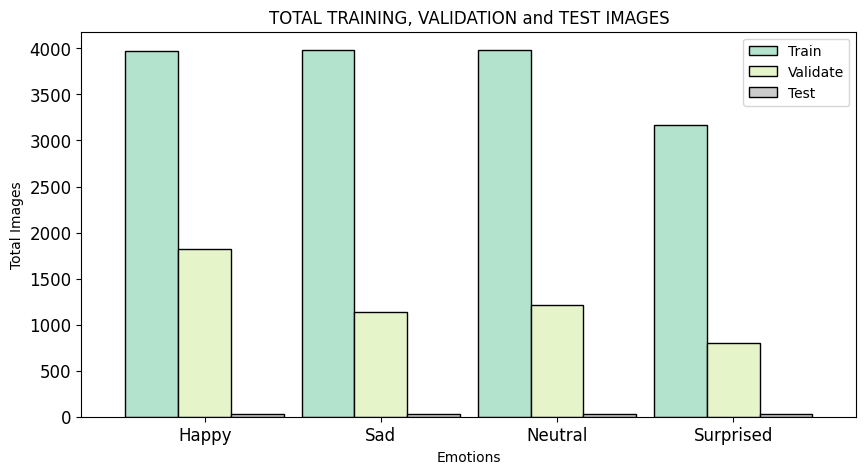

In [ ]:
# Concatenating train_df, val_df, and test_df to create "df_total" in order to create the chart below

df_total = pd.concat([train_df, val_df, test_df], axis=1)
df_total.drop(['Percentage'], axis=1, inplace=True)
df_total = df_total.reset_index()
df_total.rename(columns={"index":"Emotions", "Total Training Images":"Train",
                   "Total Validation Images":"Validate", "Total Test Images":"Test"}, inplace=True)

# Creating bar chart below, grouped by class (i.e. 'emotion') and broken down into "train", "validate",
# and "test" data. The x-axis is Emotions and the y-axis is Total Images.

df_total.groupby("Emotions", sort=False).mean().plot(kind='bar', figsize=(10,5),
                            title="TOTAL TRAINING, VALIDATION and TEST IMAGES",
                            ylabel="Total Images", rot=0, fontsize=12, width=0.9, colormap="Pastel2",
                            edgecolor='black')
plt.show()

**Observations:**<br>
* Depicted graphically, the distribution of classes is clearly imbalanced, but the imbalance is not overpowering.
* Perhaps most striking is the tiny proportion of test images compared to training images. Rather than a standard machine learning train/validation/test split of 80/10/10 or 70/20/10, the data as provided for this project is 75% training, 24.5% validation, and just 0.5% test. As the data is provided already split into groups, we will work as intended. The vast majority of data will be used to train and then validate our models, with a tiny proportion used for testing. This should work in our favor, maximizing the amount of data used by our models to train.


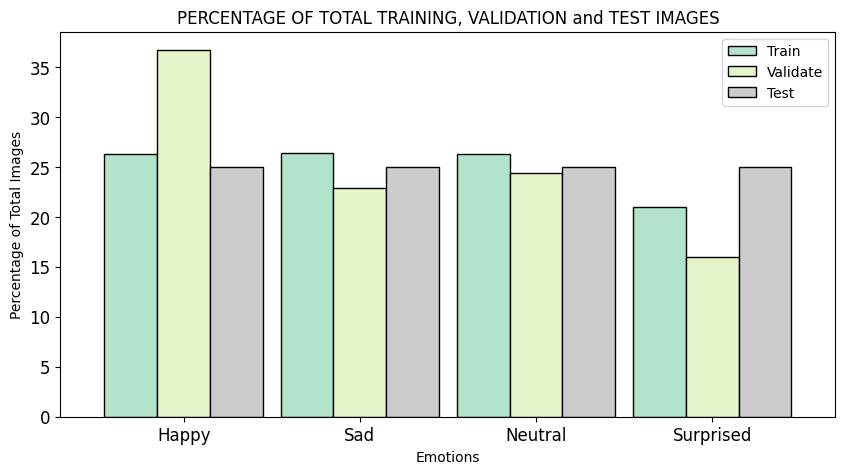

In [ ]:
# Concatenating train_df, val_df, and test_df to create "df_percent" in order to create the chart below

df_percent = pd.concat([train_df, val_df, test_df], axis=1)
df_percent.drop(['Total Training Images', 'Total Validation Images', 'Total Test Images'], axis=1, inplace=True)
df_percent.columns = ["Train", "Validate", "Test"]

# Creating bar chart below, grouped by class (i.e. 'emotion') and broken down into "train", "validate",
# and "test" data. The x-axis is Emotions and the y-axis is Percentage of Total Images.

df_percent.groupby("Emotions", sort=False).mean().plot(kind='bar', figsize=(10,5),
                            title="PERCENTAGE OF TOTAL TRAINING, VALIDATION and TEST IMAGES",
                            ylabel="Percentage of Total Images", rot=0, fontsize=12, width=0.9, colormap="Pastel2",
                            edgecolor='black')
plt.show()

**Observations:**
* A visual depiction of what was discussed earlier. We can see the percentage breakdown of train/validate/test data across classes.
* Training data is evenly distributed across happy, sad, and neutral classes, with fewer surprise images.
* Within the validation data set, happy images clearly make up the largest percent of total images, with surprise images coming in a distant last place.
* Happy images make up a much larger percentage of the validation data set than they do of the training and test data sets.
* Surprise images make up a larger percentage of the test data set than they do of the training and validation data sets.

In [ ]:
# Obtaining the average pixel value for training images in the class 'Happy'
list_train_happy = []

for i in range(len(os.listdir("Facial_emotion_images/train/happy/"))):
    list_x = []
    x = os.listdir("Facial_emotion_images/train/happy/")[i]
    im = Image.open("Facial_emotion_images/train/happy/"+x, 'r')
    pix_val = list(im.getdata())
    for j in range(len(pix_val)):
        list_x.append(pix_val[j])
    list_train_happy.append(sum(list_x)/len(pix_val))

train_happy_pixel_avg = round(sum(list_train_happy)/len(list_train_happy), 2)

# Obtaining the average pixel value for validation images in the class 'Happy'
list_val_happy = []

for i in range(len(os.listdir("Facial_emotion_images/validation/happy/"))):
    list_x = []
    x = os.listdir("Facial_emotion_images/validation/happy/")[i]
    im = Image.open("Facial_emotion_images/validation/happy/"+x, 'r')
    pix_val = list(im.getdata())
    for j in range(len(pix_val)):
        list_x.append(pix_val[j])
    list_val_happy.append(sum(list_x)/len(pix_val))

val_happy_pixel_avg = round(sum(list_val_happy)/len(list_val_happy), 2)

# Obtaining the average pixel value for test images in the class 'Happy'
list_test_happy = []

for i in range(len(os.listdir("Facial_emotion_images/test/happy/"))):
    list_x = []
    x = os.listdir("Facial_emotion_images/test/happy/")[i]
    im = Image.open("Facial_emotion_images/test/happy/"+x, 'r')
    pix_val = list(im.getdata())
    for j in range(len(pix_val)):
        list_x.append(pix_val[j])
    list_test_happy.append(sum(list_x)/len(pix_val))

test_happy_pixel_avg = round(sum(list_test_happy)/len(list_test_happy), 2)

# Obtaining the average pixel value for training images in the class 'Sad'
list_train_sad = []

for i in range(len(os.listdir("Facial_emotion_images/train/sad/"))):
    list_x = []
    x = os.listdir("Facial_emotion_images/train/sad/")[i]
    im = Image.open("Facial_emotion_images/train/sad/"+x, 'r')
    pix_val = list(im.getdata())
    for j in range(len(pix_val)):
        list_x.append(pix_val[j])
    list_train_sad.append(sum(list_x)/len(pix_val))

train_sad_pixel_avg = round(sum(list_train_sad)/len(list_train_sad), 2)

# Obtaining the average pixel value for validation images in the class 'Sad'
list_val_sad = []

for i in range(len(os.listdir("Facial_emotion_images/validation/sad/"))):
    list_x = []
    x = os.listdir("Facial_emotion_images/validation/sad/")[i]
    im = Image.open("Facial_emotion_images/validation/sad/"+x, 'r')
    pix_val = list(im.getdata())
    for j in range(len(pix_val)):
        list_x.append(pix_val[j])
    list_val_sad.append(sum(list_x)/len(pix_val))

val_sad_pixel_avg = round(sum(list_val_sad)/len(list_val_sad), 2)

# Obtaining the average pixel value for test images in the class 'Sad'
list_test_sad = []

for i in range(len(os.listdir("Facial_emotion_images/test/sad/"))):
    list_x = []
    x = os.listdir("Facial_emotion_images/test/sad/")[i]
    im = Image.open("Facial_emotion_images/test/sad/"+x, 'r')
    pix_val = list(im.getdata())
    for j in range(len(pix_val)):
        list_x.append(pix_val[j])
    list_test_sad.append(sum(list_x)/len(pix_val))

test_sad_pixel_avg = round(sum(list_test_sad)/len(list_test_sad), 2)

# Obtaining the average pixel value for training images in the class 'Neutral'
list_train_neutral = []

for i in range(len(os.listdir("Facial_emotion_images/train/neutral/"))):
    list_x = []
    x = os.listdir("Facial_emotion_images/train/neutral/")[i]
    im = Image.open("Facial_emotion_images/train/neutral/"+x, 'r')
    pix_val = list(im.getdata())
    for j in range(len(pix_val)):
        list_x.append(pix_val[j])
    list_train_neutral.append(sum(list_x)/len(pix_val))

train_neutral_pixel_avg = round(sum(list_train_neutral)/len(list_train_neutral), 2)

# Obtaining the average pixel value for validation images in the class 'Neutral'
list_val_neutral = []

for i in range(len(os.listdir("Facial_emotion_images/validation/neutral/"))):
    list_x = []
    x = os.listdir("Facial_emotion_images/validation/neutral/")[i]
    im = Image.open("Facial_emotion_images/validation/neutral/"+x, 'r')
    pix_val = list(im.getdata())
    for j in range(len(pix_val)):
        list_x.append(pix_val[j])
    list_val_neutral.append(sum(list_x)/len(pix_val))

val_neutral_pixel_avg = round(sum(list_val_neutral)/len(list_val_neutral), 2)

# Obtaining the average pixel value for test images in the class 'Neutral'
list_test_neutral = []

for i in range(len(os.listdir("Facial_emotion_images/test/neutral/"))):
    list_x = []
    x = os.listdir("Facial_emotion_images/test/neutral/")[i]
    im = Image.open("Facial_emotion_images/test/neutral/"+x, 'r')
    pix_val = list(im.getdata())
    for j in range(len(pix_val)):
        list_x.append(pix_val[j])
    list_test_neutral.append(sum(list_x)/len(pix_val))

test_neutral_pixel_avg = round(sum(list_test_neutral)/len(list_test_neutral), 2)

# Obtaining the average pixel value for training images in the class 'Surprise'
list_train_surprise = []

for i in range(len(os.listdir("Facial_emotion_images/train/surprise/"))):
    list_x = []
    x = os.listdir("Facial_emotion_images/train/surprise/")[i]
    im = Image.open("Facial_emotion_images/train/surprise/"+x, 'r')
    pix_val = list(im.getdata())
    for j in range(len(pix_val)):
        list_x.append(pix_val[j])
    list_train_surprise.append(sum(list_x)/len(pix_val))

train_surprise_pixel_avg = round(sum(list_train_surprise)/len(list_train_surprise), 2)

# Obtaining the average pixel value for validation images in the class 'Surprise'
list_val_surprise = []
for i in range(len(os.listdir("Facial_emotion_images/validation/surprise/"))):
    list_x = []
    x = os.listdir("Facial_emotion_images/validation/surprise/")[i]
    im = Image.open("Facial_emotion_images/validation/surprise/"+x, 'r')
    pix_val = list(im.getdata())
    for j in range(len(pix_val)):
        list_x.append(pix_val[j])
    list_val_surprise.append(sum(list_x)/len(pix_val))

val_surprise_pixel_avg = round(sum(list_val_surprise)/len(list_val_surprise), 2)

# Obtaining the average pixel value for test images in the class 'Surprise'
list_test_surprise = []

for i in range(len(os.listdir("Facial_emotion_images/test/surprise/"))):
    list_x = []
    x = os.listdir("Facial_emotion_images/test/surprise/")[i]
    im = Image.open("Facial_emotion_images/test/surprise/"+x, 'r')
    pix_val = list(im.getdata())
    for j in range(len(pix_val)):
        list_x.append(pix_val[j])
    list_test_surprise.append(sum(list_x)/len(pix_val))

test_surprise_pixel_avg = round(sum(list_test_surprise)/len(list_test_surprise), 2)

# creating dictionary containing average pixel values by class
dict_pixel_avg = {
    "Emotion": ["Happy", "Sad", "Neutral", "Surprise"],
    "Train": [train_happy_pixel_avg, train_sad_pixel_avg, train_neutral_pixel_avg, train_surprise_pixel_avg],
    "Validate": [val_happy_pixel_avg, val_sad_pixel_avg, val_neutral_pixel_avg, val_surprise_pixel_avg],
    "Test": [test_happy_pixel_avg, test_sad_pixel_avg, test_neutral_pixel_avg, test_surprise_pixel_avg]}

# converting dictionary to dataframe
df_pixel_avg = pd.DataFrame.from_dict(dict_pixel_avg)
df_pixel_avg

,Emotion,Train,Validate,Test
0,Happy,128.92,129.27,134.07
1,Sad,121.10,120.25,125.68
2,Neutral,124.09,123.92,127.68
3,Surprise,145.78,148.32,144.59


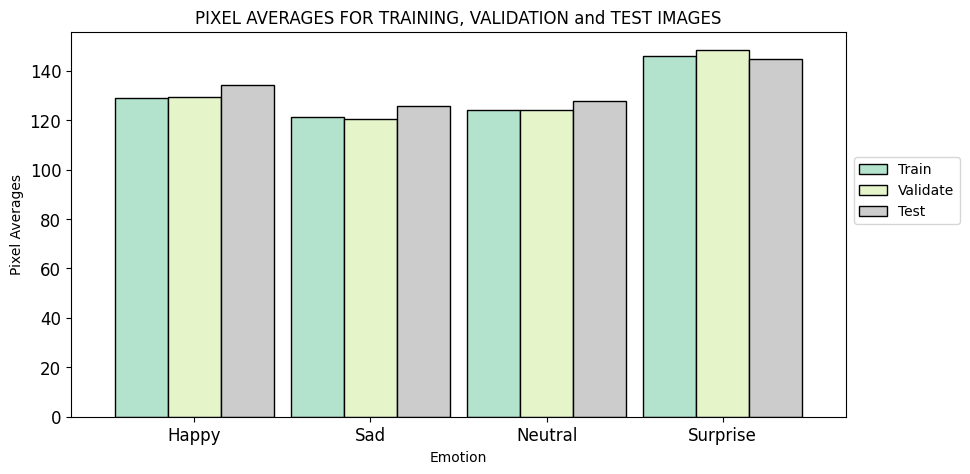

In [ ]:
# plotting pixel averages for training, validation and test images

df_pixel_avg.groupby("Emotion", sort=False).mean().plot(kind='bar', figsize=(10,5),
                            title="PIXEL AVERAGES FOR TRAINING, VALIDATION and TEST IMAGES",
                            ylabel="Pixel Averages", rot=0, fontsize=12, width=0.9, colormap="Pastel2",
                            edgecolor='black')
plt.legend(loc=(1.01, 0.5))
plt.show()

**Observations: Pixel Values**
* In grayscale, a value of 255 indicates white while a value of 0 indicates black.
* Consistent across training, validation, and test data sets, images in the surprise class have a higher average pixel value than images across the other three classes. In other words, surprise images are consistently brighter/lighter than happy, sad, and neutral images. Perhaps this is due to mouths being open more consistently and white teeth being exposed, as well as eyes being open wider and therefore more white being visible.
* As surprise is the least represented class across training and validation data sets, perhaps this is another unique characteristic that will help differentiate it from the other three classes despite making up a smaller percentage of total images on which to train.
* Across training, validation, and test data sets, images in the sad class have a lower average pixel value than images across the other three classes. In other words, sad images are consistently darker than happy, neutral, and surprise images.
* It will be interesting to see if average pixel value can help our models more easily learn the sad and surprise images. The confusion matrix will show us how often sad images and surprise images are confused with one another.
* Also interesting to note, while the sad and neutral images are the most similar visually (in terms of features), they are also the most similar when it comes to pixel values. Again, a look at the final confusion matrix will show us whether or not the two are more likely to be confused with one another.


**Note:**<br>
Data pre-processing and augmentation will take place during the creation of data loaders. When ImageDataGenerator objects are instantiated, a range of processes can and will be applied, sometimes to varying degrees, depending on the model being created and trained. Some process/augmentation operations include the following:<br>
* **rotation_range** allows us to provide a degree range for random rotations of images. This helps address the issue of faces in the training images being tilted in different directions.
* **height_shift_range** allows us to shift the image up and down.
* **width_shift_range** allows us to shift the image left and right.
* **brightness_range** allows us to address the wide range in pixel values from one image to the next. A number smaller than one makes an image darker, and a number larger than one makes an image lighter.
* **shear_range** allows us to shear angle in a counter-clockwise direction.
* **zoom_range** allows us to zoom in or out, essentially randomly cropping the images.
* **horizontal_flip** allows us to flip the training image so it is a mirror image of itself. An image facing left will now face right, etc.
* **rescale** is our opportunity to normalize the input image from a tensor filled with numbers from 0 to 255, down to a tensor of numbers ranging from 0 to 1.

While creating our data sets via **flow_from_directory**, we have an opportunity to set class_mode to 'categorical', which will essentially one-hot-encode our classes. The classes themselves are then defined as 'happy,' 'sad,' 'neutral,' and 'surprise.' This allows us to set our loss to **categorical_crossentropy**, which itself is used for multi-class classification where each image (in our case) belongs to a single class.

## **Creating Data Loaders**

Creating data loaders that we will use as inputs to our initial neural networks. We will create separate data loaders for color_modes grayscale and RGB so we can compare the results. An image that is grayscale has only 1 channel, with pixel values ranging from 0 to 255, while an RGB image has 3 channels, with each pixel having a value for red, green, and blue. Images that are RGB are therefore more complex for a neural network to process.


In [ ]:
batch_size  = 32

# Creating ImageDataGenerator objects for grayscale colormode
datagen_train_grayscale = ImageDataGenerator(horizontal_flip = True,
                                             brightness_range = (0.,2.),
                                             rescale = 1./255,
                                             shear_range = 0.3)

datagen_validation_grayscale = ImageDataGenerator(horizontal_flip = True,
                                                  brightness_range = (0.,2.),
                                                  rescale = 1./255,
                                                  shear_range = 0.3)

datagen_test_grayscale = ImageDataGenerator(horizontal_flip = True,
                                            brightness_range = (0.,2.),
                                            rescale = 1./255,
                                            shear_range = 0.3)


# Creating ImageDataGenerator objects for RGB colormode
datagen_train_rgb = ImageDataGenerator(horizontal_flip = True,
                                       brightness_range = (0.,2.),
                                       rescale = 1./255,
                                       shear_range = 0.3)

datagen_validation_rgb = ImageDataGenerator(horizontal_flip = True,
                                            brightness_range = (0.,2.),
                                            rescale = 1./255,
                                            shear_range = 0.3)

datagen_test_rgb = ImageDataGenerator(horizontal_flip = True,
                                      brightness_range = (0.,2.),
                                      rescale = 1./255,
                                      shear_range = 0.3)



# Creating train, validation, and test sets for grayscale colormode

print("Grayscale Images")

train_set_grayscale = datagen_train_grayscale.flow_from_directory(dir_train,
                        target_size = (img_size, img_size),
                        color_mode = "grayscale",
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                        seed = 42,
                        shuffle = True)

val_set_grayscale = datagen_validation_grayscale.flow_from_directory(dir_validation,
                        target_size = (img_size, img_size),
                        color_mode = "grayscale",
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                        seed = 42,
                        shuffle = False)

test_set_grayscale = datagen_test_grayscale.flow_from_directory(dir_test,
                        target_size = (img_size, img_size),
                        color_mode = "grayscale",
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                        seed = 42,
                        shuffle = False)



# Creating train, validation, and test sets for RGB colormode

print("\nColor Images")

train_set_rgb = datagen_train_rgb.flow_from_directory(dir_train,
                        target_size = (img_size, img_size),
                        color_mode = "rgb",
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                        seed = 42,
                        shuffle = True)

val_set_rgb = datagen_validation_rgb.flow_from_directory(dir_validation,
                        target_size = (img_size, img_size),
                        color_mode = "rgb",
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                        seed = 42,
                        shuffle = False)

test_set_rgb = datagen_test_rgb.flow_from_directory(dir_test,
                        target_size = (img_size, img_size),
                        color_mode = "rgb",
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                        seed = 42,
                        shuffle = False)



Grayscale Images
Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.

Color Images
Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


**Note:**<br>
Data augmentation performed on the data for these initial models includes **horizontal_flip**, **brightness_range**, **rescale**, and **shear_range**.

## **Model Building**

**A Note About Neural Networks:**<br>
The best algorithmic tools we have available to us for processing images are neural networks. In particular, convolutional neural networks (CNN) have significant advantages over standard artificial neural networks (ANN).<br>

While image classification utilizing ANNs is possible, there are some drawbacks:
* **Translational Invariance:** ANNs are not translation invariant, meaning that the location of objects within the image is learned along with the object itself. If the object is located in different areas of the image, varying from image to image, the ANN will likely produce inconsistent results.
* **Spacial Invariance:** ANNs are not spatial invariant, meaning that once the image matrix is converted/flattened into an array, they lose spatial information about the image. In reality, nearby pixels within an image should be more strongly related to one another, but an ANN does not leverage this information.
* **Feature Extraction:** ANNs give similar importance to each pixel within an image, meaning that they are learning the background of the image to the same degree that they are learning the object within the image. If the background changes from image to image, the ANN will have a difficult time learning that the object itself is the same despite what is going on in the background of the image.
* **Computational Expense:** ANNs need input images to be flattened into an array of pixel values, and as the input images get larger and the number of hidden layers increases, the total number of trainable parameters balloons considerably.

On the other hand, through the use of convolutional and pooling layers, CNNs are translationally and spatially invariant. They are able to understand that the location of an object within an image is not important, nor is the background of the image itself. CNNs, through the use of their convolutional layers, are also better able to extract important features of an object within an image. Finally, CNNs take advantage of weight sharing, as the same filters are applied to each area of the image. This reduces the number of weights that need to be learned through backpropagation, thereby minimizing the number of trainable parameters and reducing computational expense.  <br>

Taking all of this into account, we will proceed with the development of CNN models to pursue our objectives.


## <span style="color:navy">Model 1.1: Base Neural Network (Grayscale)</span>

**Note:**<br>
We will begin by building a simple CNN model to serve as a baseline for future models. The same model will be built with color_mode set to grayscale (with an input shape of 48,48,1) as well as color_mode set to RGB (with an input shape of 48,48,3). The models will then be compared to determine if one approach outperforms the other. <br><br>
A baseline grayscale model is developed first. It consists of three convolutional blocks with relu activation, MaxPooling and a Dropout layer, followed by a single dense layer with 512 neurons, and a softmax classifier for multi-class classification. Total trainable parameters are 605,060.

In [ ]:
# Creating a Sequential model
model_1_grayscale = Sequential()

# Convolutional Block #1
model_1_grayscale.add(Conv2D(64, (2, 2), input_shape = (48, 48, 1), activation='relu', padding = 'same'))
model_1_grayscale.add(MaxPooling2D(2, 2))
model_1_grayscale.add(Dropout(0.2))

# Convolutional Block #2
model_1_grayscale.add(Conv2D(32, (2, 2), activation='relu', padding = 'same'))
model_1_grayscale.add(MaxPooling2D(2, 2))
model_1_grayscale.add(Dropout(0.2))

# Convolutional Block #3
model_1_grayscale.add(Conv2D(32, (2, 2), activation='relu', padding = 'same'))
model_1_grayscale.add(MaxPooling2D(2, 2))
model_1_grayscale.add(Dropout(0.2))

# Flatten layer
model_1_grayscale.add(Flatten())

# Dense layer
model_1_grayscale.add(Dense(512, activation = 'relu'))

# Classifier
model_1_grayscale.add(Dense(4, activation = 'softmax'))

model_1_grayscale.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 12, 12, 32)       

### **Compiling and Training the Model**


In [ ]:
# Creating a checkpoint which saves model weights from the best epoch
checkpoint = ModelCheckpoint("./model_1_grayscale.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# Initiates early stopping if validation loss does not continue to improve
early_stopping = EarlyStopping(monitor = 'val_loss',
                              min_delta = 0,
                              patience = 5,
                              verbose = 1,
                              restore_best_weights = True)

# Initiates reduced learning rate if validation loss does not continue to improve
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                                        factor = 0.2,
                                        patience = 3,
                                        verbose = 1,
                                        min_delta = 0.0001)

callbacks_list = [checkpoint, early_stopping, reduce_learningrate]

In [ ]:
# Compiling model with optimizer set to Adam, loss set to categorical_crossentropy, and metrics set to accuracy
model_1_grayscale.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting model with epochs set to 30
#history_1_grayscale = model_1_grayscale.fit(train_set_grayscale, validation_data = val_set_grayscale, epochs = 30, callbacks = callbacks_list)
history_1_grayscale = model_1_grayscale.fit(train_set_grayscale, validation_data = val_set_grayscale, epochs = 30, callbacks = callbacks_list)

Epoch 1/30
473/473 [==============================] - ETA: 0s - loss: 1.3152 - accuracy: 0.3544
Epoch 1: val_accuracy improved from -inf to 0.48101, saving model to ./model_1_grayscale.h5
473/473 [==============================] - 35s 69ms/step - loss: 1.3152 - accuracy: 0.3544 - val_loss: 1.2044 - val_accuracy: 0.4810 - lr: 0.0010
Epoch 2/30
472/473 [============================>.] - ETA: 0s - loss: 1.1739 - accuracy: 0.4720
Epoch 2: val_accuracy improved from 0.48101 to 0.54913, saving model to ./model_1_grayscale.h5
473/473 [==============================] - 24s 50ms/step - loss: 1.1738 - accuracy: 0.4721 - val_loss: 1.0667 - val_accuracy: 0.5491 - lr: 0.0010
Epoch 3/30
473/473 [==============================] - ETA: 0s - loss: 1.0805 - accuracy: 0.5280
Epoch 3: val_accuracy improved from 0.54913 to 0.55817, saving model to ./model_1_grayscale.h5
473/473 [==============================] - 23s 48ms/step - loss: 1.0805 - accuracy: 0.5280 - val_loss: 1.0219 - val_accuracy: 0.5582 - lr:

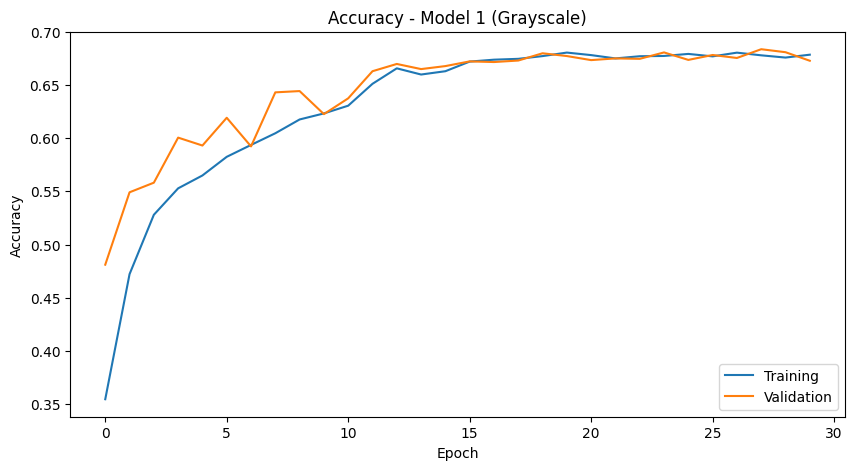

In [ ]:
# Plotting the accuracies

plt.figure(figsize = (10, 5))
plt.plot(history_1_grayscale.history['accuracy'])
plt.plot(history_1_grayscale.history['val_accuracy'])
plt.title('Accuracy - Model 1 (Grayscale)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

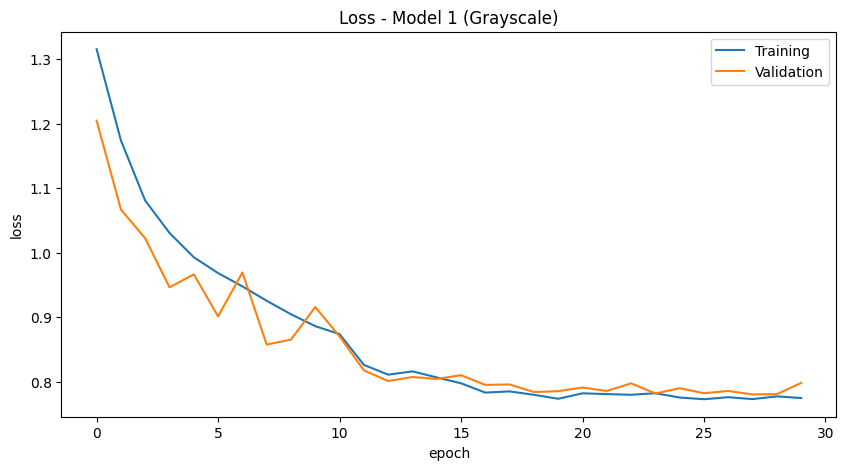

In [ ]:
# Plotting the losses

plt.figure(figsize = (10, 5))
plt.plot(history_1_grayscale.history['loss'])
plt.plot(history_1_grayscale.history['val_loss'])
plt.title('Loss - Model 1 (Grayscale)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### **Evaluating the Model on the Test Set**

In [ ]:
# Evaluating the model's performance on the test set
accuracy = model_1_grayscale.evaluate(test_set_grayscale)

4/4 [==============================] - 0s 33ms/step - loss: 0.8223 - accuracy: 0.6250


**Observations and Insights:**<br>
As constructed, our baseline grayscale model performs decently. After 28 epochs (best epoch), training accuracy stands at 0.68 and validation accuracy is 0.68. Training accuracy and loss continue to improve, while validation accuracy and loss begin to level off before early-stopping ends the training process. Accuracy on the test set is 0.625. A glance at the results, and the accuracy/loss graphs above, reveals a model that is overfitting and consequently has some room for improvement.

|  | Training | Validation | Test |
| --- | --- | --- | --- |
|  Grayscale Accuracy |0.68 | 0.68 | 0.625 |
<br>




## <span style="color:navy">Model 1.2: Base Neural Network (RGB)</span>


**Note:**<br>
This baseline model will contain the same architecture as the above grayscale model. Due to the input shape changing from 48,48,1 (grayscale) to 48,48,3 (rgb), the total trainable parameters have increased to 605,572.


In [ ]:
# Creating a Sequential model
model_1_rgb = Sequential()

# Convolutional Block #1
model_1_rgb.add(Conv2D(64, (2, 2), input_shape = (48, 48, 3), activation='relu', padding = 'same'))
model_1_rgb.add(MaxPooling2D(2, 2))
model_1_rgb.add(Dropout(0.2))

# Convolutional Block #2
model_1_rgb.add(Conv2D(32, (2, 2), activation='relu', padding = 'same'))
model_1_rgb.add(MaxPooling2D(2, 2))
model_1_rgb.add(Dropout(0.2))

# Convolutional Block #3
model_1_rgb.add(Conv2D(32, (2, 2), activation='relu', padding = 'same'))
model_1_rgb.add(MaxPooling2D(2, 2))
model_1_rgb.add(Dropout(0.2))

# Flatten layer
model_1_rgb.add(Flatten())

# Dense layer
model_1_rgb.add(Dense(512, activation = 'relu'))

# Classifier
model_1_rgb.add(Dense(4, activation = 'softmax'))

model_1_rgb.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 64)        832       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 32)       

### **Compiling and Training the Model**


In [ ]:
# Creating a checkpoint which saves model weights from the best epoch
checkpoint = ModelCheckpoint("./model_1_rgb.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# Initiates early stopping if validation loss does not continue to improve
early_stopping = EarlyStopping(monitor = 'val_loss',
                              min_delta = 0,
                              patience = 5,
                              verbose = 1,
                              restore_best_weights = True)

# Initiates reduced learning rate if validation loss does not continue to improve
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                                        factor = 0.2,
                                        patience = 3,
                                        verbose = 1,
                                        min_delta = 0.0001)

callbacks_list = [checkpoint, early_stopping, reduce_learningrate]

In [ ]:
# Compiling model with optimizer set to Adam, loss set to categorical_crossentropy, and metrics set to accuracy
model_1_rgb.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting model with epochs set to 30
history_1_rgb = model_1_rgb.fit(train_set_rgb, validation_data = val_set_rgb, epochs = 30, callbacks = callbacks_list)

Epoch 1/30
473/473 [==============================] - ETA: 0s - loss: 1.3628 - accuracy: 0.3058
Epoch 1: val_accuracy improved from -inf to 0.43078, saving model to ./model_1_rgb.h5
473/473 [==============================] - 36s 72ms/step - loss: 1.3628 - accuracy: 0.3058 - val_loss: 1.2648 - val_accuracy: 0.4308 - lr: 0.0010
Epoch 2/30
473/473 [==============================] - ETA: 0s - loss: 1.2368 - accuracy: 0.4415
Epoch 2: val_accuracy improved from 0.43078 to 0.50412, saving model to ./model_1_rgb.h5
473/473 [==============================] - 34s 71ms/step - loss: 1.2368 - accuracy: 0.4415 - val_loss: 1.1480 - val_accuracy: 0.5041 - lr: 0.0010
Epoch 3/30
473/473 [==============================] - ETA: 0s - loss: 1.1336 - accuracy: 0.5015
Epoch 3: val_accuracy improved from 0.50412 to 0.55515, saving model to ./model_1_rgb.h5
473/473 [==============================] - 36s 76ms/step - loss: 1.1336 - accuracy: 0.5015 - val_loss: 1.0656 - val_accuracy: 0.5552 - lr: 0.0010
Epoch 4/30

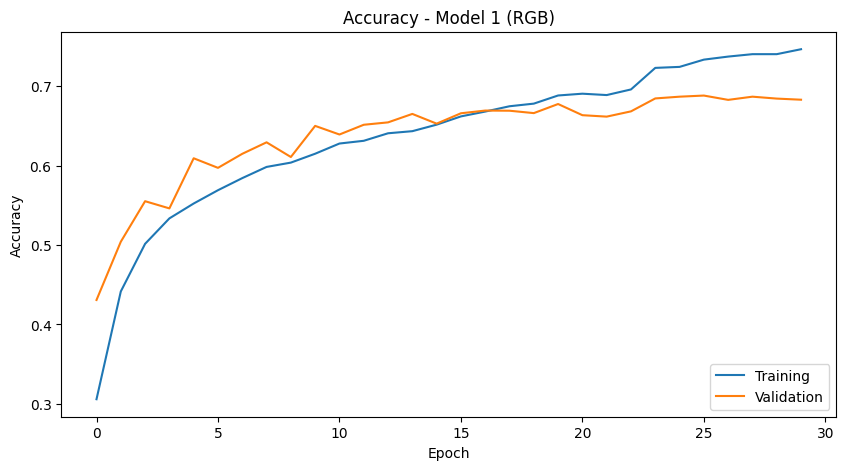

In [ ]:
# Plotting the accuracies

plt.figure(figsize = (10, 5))
plt.plot(history_1_rgb.history['accuracy'])
plt.plot(history_1_rgb.history['val_accuracy'])
plt.title('Accuracy - Model 1 (RGB)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

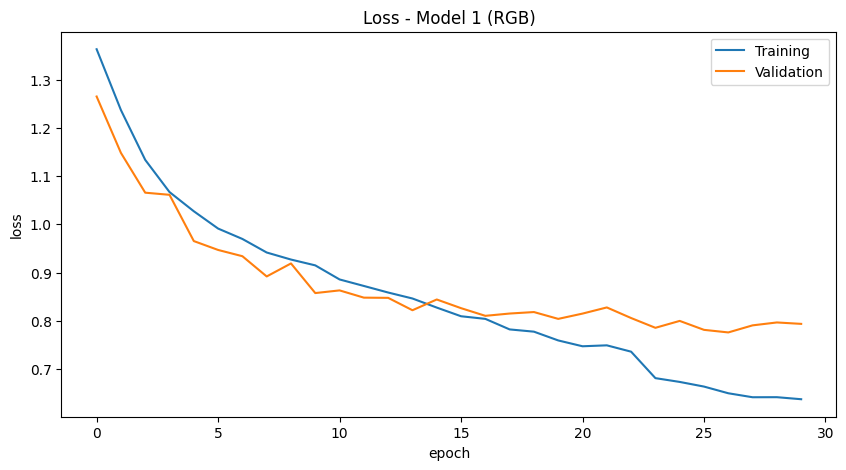

In [ ]:
# Plotting the losses

plt.figure(figsize = (10, 5))
plt.plot(history_1_rgb.history['loss'])
plt.plot(history_1_rgb.history['val_loss'])
plt.title('Loss - Model 1 (RGB)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### **Evaluating the Model on the Test Set**

In [ ]:
# Evaluating the model's performance on the test set
accuracy = model_1_rgb.evaluate(test_set_rgb)

4/4 [==============================] - 0s 50ms/step - loss: 0.7634 - accuracy: 0.6953


**Observations and Insights:**<br>
As constructed, our baseline RGB model also performs decently. After 24 epochs (best epoch), training accuracy stands at 0.72 and validation accuracy is 0.68. Training accuracy and loss continue to improve, while validation accuracy and loss begin to level off before early-stopping ends the training process. Accuracy on the test set is 0.63.<br>

Our baseline grayscale and RGB models perform similarly across all metrics. Overall, both models underfit the data for 10-15 epochs, likely due to the addition of Dropout layers in the model architecture, after which the models begin to overfit the data, performing similarly. Perhaps a slight edge to the grayscale model for performing better on the test set with a smaller number of trainable parameters, making it computationally less expensive when scaled.



|  | Training | Validation | Test |
| --- | --- | --- | --- |
| Grayscale Accuracy |0.72 | 0.68 | 0.65 |
| RGB Accuracy | 0.72 | 0.68 | 0.63 |
<br>


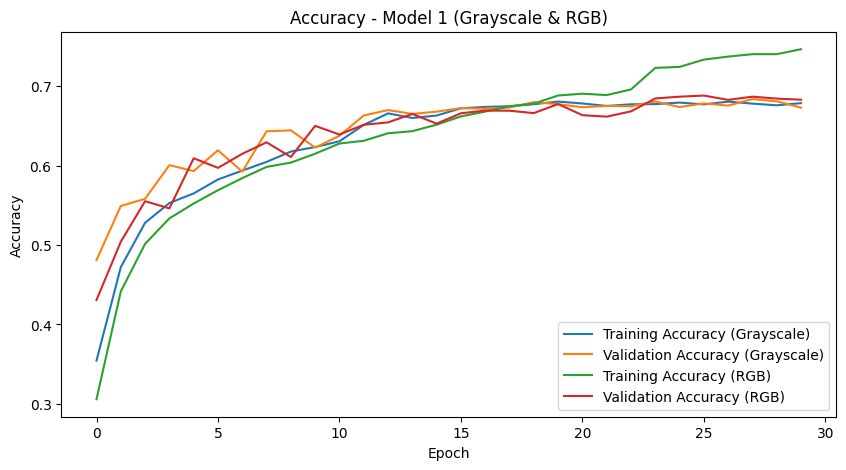

In [ ]:
# Plotting the accuracies

plt.figure(figsize = (10, 5))
plt.plot(history_1_grayscale.history['accuracy'])
plt.plot(history_1_grayscale.history['val_accuracy'])
plt.plot(history_1_rgb.history['accuracy'])
plt.plot(history_1_rgb.history['val_accuracy'])
plt.title('Accuracy - Model 1 (Grayscale & RGB)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy (Grayscale)', 'Validation Accuracy (Grayscale)',
            'Training Accuracy (RGB)', 'Validation Accuracy (RGB)'], loc='lower right')
plt.show()

## <span style="color:navy">Model 2.1: 2nd Generation (Grayscale)</span>


**Note:**<br>
We will now build a slightly deeper model to see if we can improve performance. Similar to our baseline models, we will train this model with color_modes of grayscale and RGB so we can compare performance. <br>

The architecture of our second model is comprised of 4 convolutional blocks with relu activation, BatchNormalization, a LeakyReLu layer, and MaxPooling, followed by a dense layer with 512 neurons, another dense layer with 256 neurons, and finally a softmax classifier. The grayscale model has a total of 455,780 parameters.



In [ ]:
# Creating a Sequential model
model_2_grayscale = Sequential()

# Convolutional Block #1
model_2_grayscale.add(Conv2D(256, (2, 2), input_shape = (48, 48, 1), activation='relu', padding = 'same'))
model_2_grayscale.add(BatchNormalization())
model_2_grayscale.add(LeakyReLU(alpha = 0.1))
model_2_grayscale.add(MaxPooling2D(2, 2))

# Convolutional Block #2
model_2_grayscale.add(Conv2D(128, (2, 2), activation='relu', padding = 'same'))
model_2_grayscale.add(BatchNormalization())
model_2_grayscale.add(LeakyReLU(alpha = 0.1))
model_2_grayscale.add(MaxPooling2D(2, 2))

# Convolutional Block #3
model_2_grayscale.add(Conv2D(64, (2, 2), activation='relu', padding = 'same'))
model_2_grayscale.add(BatchNormalization())
model_2_grayscale.add(LeakyReLU(alpha = 0.1))
model_2_grayscale.add(MaxPooling2D(2, 2))

# Convolutional Block #4
model_2_grayscale.add(Conv2D(32, (2, 2), activation='relu', padding = 'same'))
model_2_grayscale.add(BatchNormalization())
model_2_grayscale.add(LeakyReLU(alpha = 0.1))
model_2_grayscale.add(MaxPooling2D(2, 2))

# Flatten layer
model_2_grayscale.add(Flatten())

# Dense layers
model_2_grayscale.add(Dense(512, activation = 'relu'))
model_2_grayscale.add(Dense(256, activation = 'relu'))

# Classifier
model_2_grayscale.add(Dense(4, activation = 'softmax'))

model_2_grayscale.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 256)       1024      
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 24, 24, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 128)      

### **Compiling and Training the Model**

In [ ]:
# Creating a checkpoint which saves model weights from the best epoch
checkpoint = ModelCheckpoint("./model_2_grayscale.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# Initiates early stopping if validation loss does not continue to improve
early_stopping = EarlyStopping(monitor = 'val_loss',
                              min_delta = 0,
                              patience = 5,
                              verbose = 1,
                              restore_best_weights = True)

# Initiates reduced learning rate if validation loss does not continue to improve
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                                        factor = 0.2,
                                        patience = 3,
                                        verbose = 1,
                                        min_delta = 0.0001)

callbacks_list = [checkpoint, early_stopping, reduce_learningrate]

In [ ]:
# Compiling model with optimizer set to Adam, loss set to categorical_crossentropy, and metrics set to accuracy
model_2_grayscale.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
# Fitting model with epochs set to 30
history_2_grayscale = model_2_grayscale.fit(train_set_grayscale, validation_data = val_set_grayscale, epochs = 30, callbacks = callbacks_list)

Epoch 1/30
472/473 [============================>.] - ETA: 0s - loss: 1.2843 - accuracy: 0.3865
Epoch 1: val_accuracy improved from -inf to 0.40466, saving model to ./model_2_grayscale.h5
473/473 [==============================] - 30s 55ms/step - loss: 1.2840 - accuracy: 0.3869 - val_loss: 1.2830 - val_accuracy: 0.4047 - lr: 0.0010
Epoch 2/30
472/473 [============================>.] - ETA: 0s - loss: 1.0889 - accuracy: 0.5104
Epoch 2: val_accuracy improved from 0.40466 to 0.50472, saving model to ./model_2_grayscale.h5
473/473 [==============================] - 26s 55ms/step - loss: 1.0889 - accuracy: 0.5104 - val_loss: 1.1707 - val_accuracy: 0.5047 - lr: 0.0010
Epoch 3/30
473/473 [==============================] - ETA: 0s - loss: 0.9769 - accuracy: 0.5709
Epoch 3: val_accuracy improved from 0.50472 to 0.54551, saving model to ./model_2_grayscale.h5
473/473 [==============================] - 25s 53ms/step - loss: 0.9769 - accuracy: 0.5709 - val_loss: 1.0337 - val_accuracy: 0.5455 - lr:

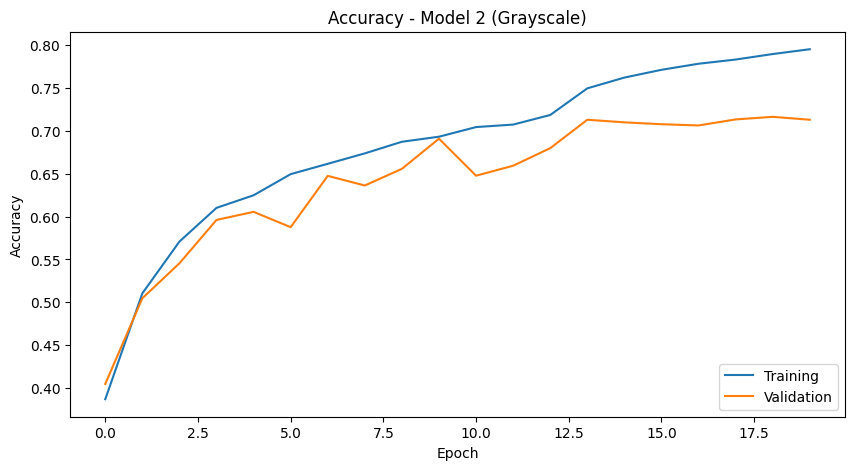

In [ ]:
# Plotting the accuracies

plt.figure(figsize = (10, 5))
plt.plot(history_2_grayscale.history['accuracy'])
plt.plot(history_2_grayscale.history['val_accuracy'])
plt.title('Accuracy - Model 2 (Grayscale)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

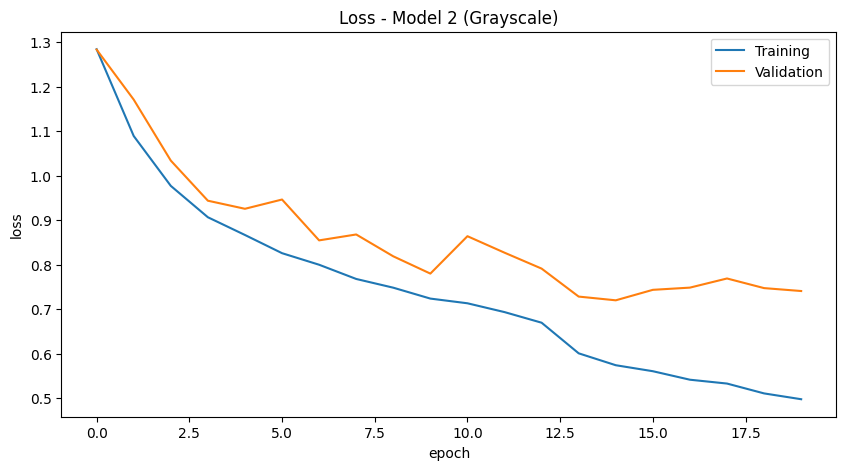

In [ ]:
# Plotting the losses

plt.figure(figsize = (10, 5))
plt.plot(history_2_grayscale.history['loss'])
plt.plot(history_2_grayscale.history['val_loss'])
plt.title('Loss - Model 2 (Grayscale)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### **Evaluating the Model on the Test Set**

In [ ]:
accuracy = model_2_grayscale.evaluate(test_set_grayscale)

4/4 [==============================] - 0s 35ms/step - loss: 0.6670 - accuracy: 0.7266


**Observations and Insights:**<br>
As constructed, our second, deeper grayscale model performs somewhat differently than its predecessor. After 18 epochs (best epoch), training accuracy stands at 0.78 and validation accuracy is 0.71, which are both higher than Model 1, but Model 2 begins to overfit almost immediately, and the gaps between training and accuracy scores only grow from there. Training accuracy and loss continue to improve, while validation accuracy and loss begin to level off before early-stopping ends the training process. Accuracy on the test set is 0.69. Our model is not generalizing well, though with better accuracy scores compared to Model 1, there is an opportunity (if overfitting can be reduced) to become the better grayscale model.




|  | Training | Validation | Test |
| --- | --- | --- | --- |
|  Grayscale Accuracy |0.78 | 0.71 | 0.69 |
<br>


## <span style="color:navy">Model 2.2: 2nd Generation (RGB)</span>


**Note:**<br>
This model will contain the same architecture as the above grayscale model. Due to the input shape changing from 48,48,1 (grayscale) to 48,48,3 (rgb), the total parameters have increased to 457,828.


In [ ]:
# Creating a Sequential model
model_2_rgb = Sequential()

# Convolutional Block #1
model_2_rgb.add(Conv2D(256, (2, 2), input_shape = (48, 48, 3), activation='relu', padding = 'same'))
model_2_rgb.add(BatchNormalization())
model_2_rgb.add(LeakyReLU(alpha = 0.1))
model_2_rgb.add(MaxPooling2D(2, 2))

# Convolutional Block #2
model_2_rgb.add(Conv2D(128, (2, 2), activation='relu', padding = 'same'))
model_2_rgb.add(BatchNormalization())
model_2_rgb.add(LeakyReLU(alpha = 0.1))
model_2_rgb.add(MaxPooling2D(2, 2))

# Convolutional Block #3
model_2_rgb.add(Conv2D(64, (2, 2), activation='relu', padding = 'same'))
model_2_rgb.add(BatchNormalization())
model_2_rgb.add(LeakyReLU(alpha = 0.1))
model_2_rgb.add(MaxPooling2D(2, 2))

# Convolutional Block #4
model_2_rgb.add(Conv2D(32, (2, 2), activation='relu', padding = 'same'))
model_2_rgb.add(BatchNormalization())
model_2_rgb.add(LeakyReLU(alpha = 0.1))
model_2_rgb.add(MaxPooling2D(2, 2))

# Flatten layer
model_2_rgb.add(Flatten())

# Dense layers
model_2_rgb.add(Dense(512, activation = 'relu'))
model_2_rgb.add(Dense(256, activation = 'relu'))

# Classifier
model_2_rgb.add(Dense(4, activation = 'softmax'))

model_2_rgb.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 48, 48, 256)       3328      
                                                                 
 batch_normalization_4 (Bat  (None, 48, 48, 256)       1024      
 chNormalization)                                                
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 24, 24, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_5 (Bat  (None, 24, 24, 128)      

### **Compiling and Training the Model**


In [ ]:
# Creating a checkpoint which saves model weights from the best epoch
checkpoint = ModelCheckpoint("./model_2_rgb.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# Initiates early stopping if validation loss does not continue to improve
early_stopping = EarlyStopping(monitor = 'val_loss',
                              min_delta = 0,
                              patience = 5,
                              verbose = 1,
                              restore_best_weights = True)

# Initiates reduced learning rate if validation loss does not continue to improve
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                                        factor = 0.2,
                                        patience = 3,
                                        verbose = 1,
                                        min_delta = 0.0001)

callbacks_list = [checkpoint, early_stopping, reduce_learningrate]

In [ ]:
# Compiling model with optimizer set to Adam, loss set to categorical_crossentropy, and metrics set to accuracy
model_2_rgb.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
# Fitting model with epochs set to 30
history_2_rgb = model_2_rgb.fit(train_set_rgb, validation_data = val_set_rgb, epochs = 30, callbacks = callbacks_list)

Epoch 1/30
473/473 [==============================] - ETA: 0s - loss: 1.2779 - accuracy: 0.3914
Epoch 1: val_accuracy improved from -inf to 0.42214, saving model to ./model_2_rgb.h5
473/473 [==============================] - 42s 81ms/step - loss: 1.2779 - accuracy: 0.3914 - val_loss: 1.2382 - val_accuracy: 0.4221 - lr: 0.0010
Epoch 2/30
473/473 [==============================] - ETA: 0s - loss: 1.0799 - accuracy: 0.5201
Epoch 2: val_accuracy improved from 0.42214 to 0.46956, saving model to ./model_2_rgb.h5
473/473 [==============================] - 40s 84ms/step - loss: 1.0799 - accuracy: 0.5201 - val_loss: 1.1814 - val_accuracy: 0.4696 - lr: 0.0010
Epoch 3/30
472/473 [============================>.] - ETA: 0s - loss: 0.9761 - accuracy: 0.5723
Epoch 3: val_accuracy improved from 0.46956 to 0.57565, saving model to ./model_2_rgb.h5
473/473 [==============================] - 36s 77ms/step - loss: 0.9760 - accuracy: 0.5724 - val_loss: 0.9600 - val_accuracy: 0.5756 - lr: 0.0010
Epoch 4/30

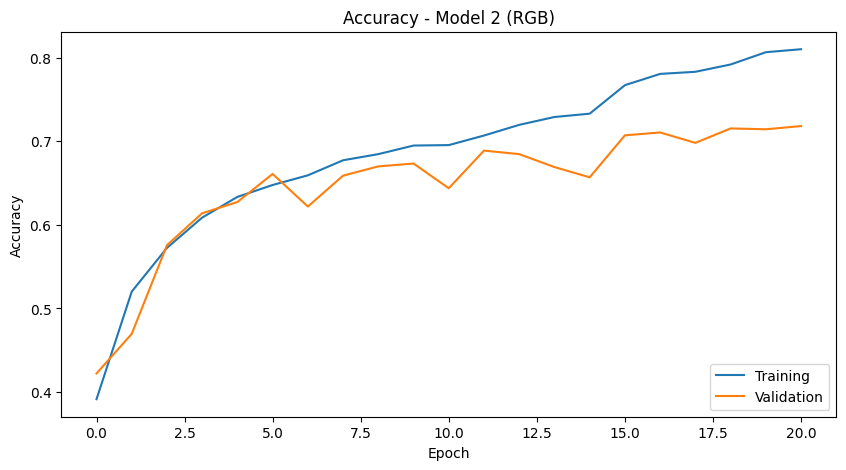

In [ ]:
# Plotting the accuracies

plt.figure(figsize = (10, 5))
plt.plot(history_2_rgb.history['accuracy'])
plt.plot(history_2_rgb.history['val_accuracy'])
plt.title('Accuracy - Model 2 (RGB)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

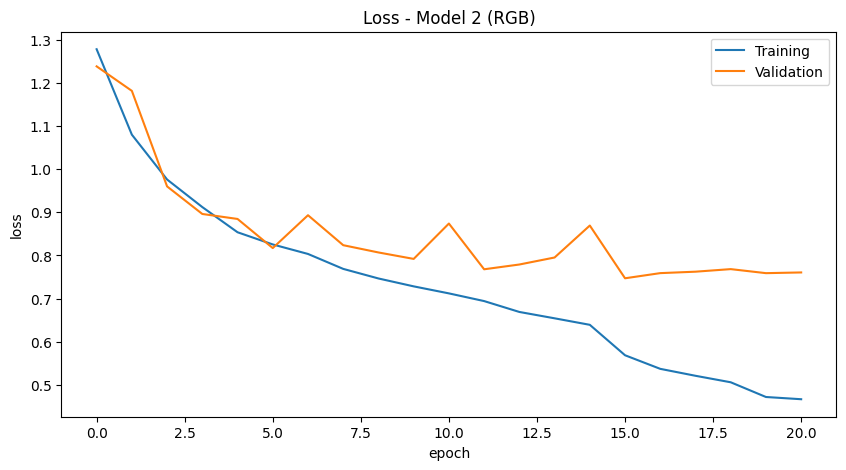

In [ ]:
# Plotting the losses

plt.figure(figsize = (10, 5))
plt.plot(history_2_rgb.history['loss'])
plt.plot(history_2_rgb.history['val_loss'])
plt.title('Loss - Model 2 (RGB)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### **Evaluating the Model on the Test Set**

In [ ]:
# Evaluating the model's performance on the test set
accuracy = model_2_rgb.evaluate(test_set_rgb)

4/4 [==============================] - 0s 46ms/step - loss: 0.6744 - accuracy: 0.7109


**Observations and Insights:**<br>

As constructed, our second RGB model also performs somewhat differently than its predecessor. After 15 epochs (best epoch), training accuracy stands at 0.76 and validation accuracy is 0.71, which are both higher than Model 1, but Model 2 begins to overfit almost immediately. Training accuracy and loss continue to improve, while validation accuracy and loss level off before early-stopping ends the training process. Accuracy on the test set is 0.68. Once again, our model is not generalizing well, though with better accuracy scores compared to Model 1, there is an opportunity (if overfitting can be reduced) to become the better RGB model.<br>

Our deeper grayscale and RGB models again perform similarly across all metrics, with the grayscale model attaining slightly better accuracies. Again, a slight edge to the grayscale model for performing better on the test set with a smaller number of trainable parameters.<br>


|  | Training | Validation | Test |
| --- | --- | --- | --- |
|  Grayscale Accuracy |0.78 | 0.71 | 0.69 |
| RGB Accuracy | 0.76 | 0.71 | 0.68 |
<br>


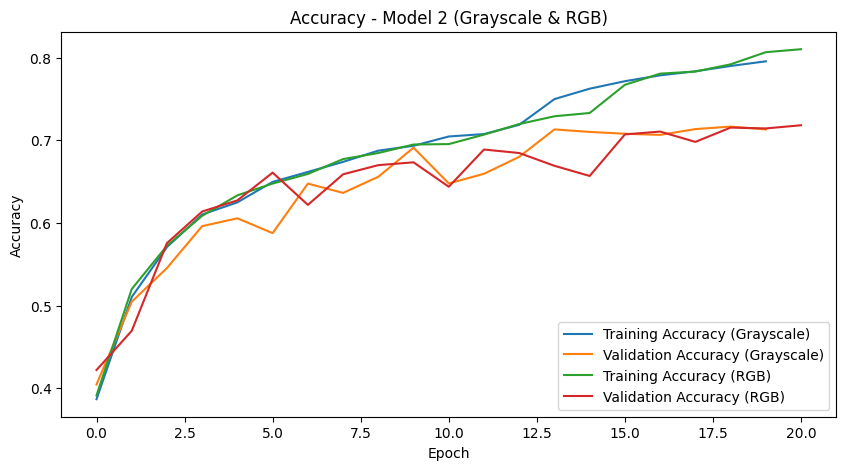

In [ ]:
# Plotting the accuracies

plt.figure(figsize = (10, 5))
plt.plot(history_2_grayscale.history['accuracy'])
plt.plot(history_2_grayscale.history['val_accuracy'])
plt.plot(history_2_rgb.history['accuracy'])
plt.plot(history_2_rgb.history['val_accuracy'])
plt.title('Accuracy - Model 2 (Grayscale & RGB)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy (Grayscale)', 'Validation Accuracy (Grayscale)',
            'Training Accuracy (RGB)', 'Validation Accuracy (RGB)'], loc='lower right')
plt.show()

**Overall Observations and Insights on Initial Models:**<br>

* As discussed above, both grayscale models slightly outperformed their RGB counterparts, and did so using less trainable parameters, making them less computationally expensive. Given this performance, we will proceed with grayscale models when doing so is possible.
* As the datasets for this project are black and white images, it is possible that a grayscale colormode works better than a RGB colormode on what are essentially grayscale images. In this case, adding a second and third channel and increasing the input shape from 48,48,1 to 48,48,3 does not seem to help the modeling, and in fact may be making it overly complex.
* As evidenced by the graph below, the 4 models thus far have fairly similar accuracy trajectories, though with a fair degree of separation between them. There is obviously room for improvement when it comes to overall accuracy. As early-stopping has prohibited us from seeing whether or not the training accuracy and loss level off before reaching 100%, it is clear that they continue to improve while validation accuracy and loss level off.
* Some possible ways to decrease overfitting and thereby improve the above models include:
    * Introduce additional forms of data augmentation. While the above models take advantage of **horizontal_flip**, **brightness_range**, **rescale**, and **sheer_range**, it is possible that introducing additional forms of data augmentation (like **width_shift_range**, **height_shift_range**, **zoon_range**, **rotation_range**, etc. as discussed above) could help improve model performance.
    * Additional use **BatchNormalization** could also improve performance by offering some degree of regularization.
    * Additional use of **DropOut** and **SpatialDropout** could also help improve performance by assisting in regularization.
    * Introducting **GaussianNoise** could also assist in regularization, adding a form of noise to the data.

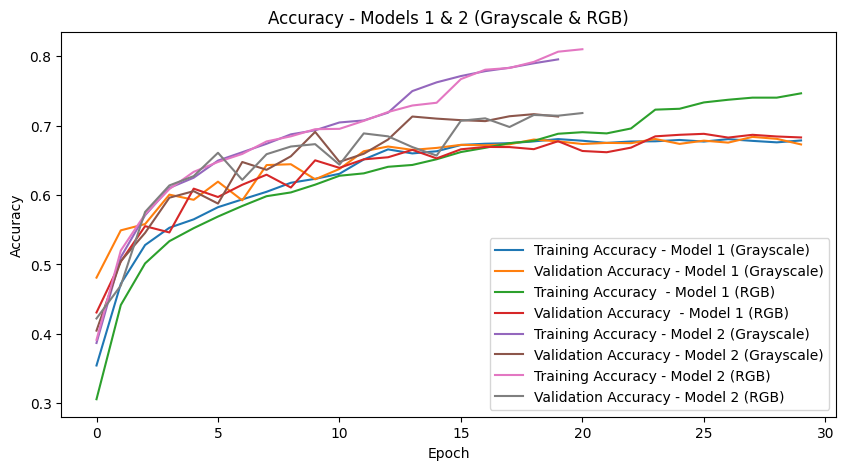

In [ ]:
# Plotting the accuracies
plt.figure(figsize = (10, 5))
plt.plot(history_1_grayscale.history['accuracy'])
plt.plot(history_1_grayscale.history['val_accuracy'])
plt.plot(history_1_rgb.history['accuracy'])
plt.plot(history_1_rgb.history['val_accuracy'])
plt.plot(history_2_grayscale.history['accuracy'])
plt.plot(history_2_grayscale.history['val_accuracy'])
plt.plot(history_2_rgb.history['accuracy'])
plt.plot(history_2_rgb.history['val_accuracy'])
plt.title('Accuracy - Models 1 & 2 (Grayscale & RGB)' )
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy - Model 1 (Grayscale)',
            'Validation Accuracy - Model 1 (Grayscale)',
            'Training Accuracy  - Model 1 (RGB)',
            'Validation Accuracy  - Model 1 (RGB)',
            'Training Accuracy - Model 2 (Grayscale)',
            'Validation Accuracy - Model 2 (Grayscale)',
            'Training Accuracy - Model 2 (RGB)',
            'Validation Accuracy - Model 2 (RGB)'], loc='lower right')
plt.show()

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures, namely: VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels (RGB) while the earlier models also worked on grayscale images.


### **Creating our Data Loaders for Transfer Learning Architectures**

We will create new data loaders for the transfer learning architectures used below. As required by the architectures we will be piggybacking, color_mode will be set to RGB.<br>

Additionally, we will be using the same data augmentation methods used on our previous models in order to better compare performance against our baseline models. These methods include **horizontal_flip**, **brightness_range**, **rescale**, and **shear_range**.


In [ ]:
batch_size  = 32

# Creating ImageDataGenerator objects for RGB colormode
datagen_train_rgb = ImageDataGenerator(horizontal_flip = True,
                                       brightness_range = (0.,2.),
                                       rescale = 1./255,
                                       shear_range = 0.3)

datagen_validation_rgb = ImageDataGenerator(horizontal_flip = True,
                                            brightness_range = (0.,2.),
                                            rescale = 1./255,
                                            shear_range = 0.3)

datagen_test_rgb = ImageDataGenerator(horizontal_flip = True,
                                      brightness_range = (0.,2.),
                                      rescale = 1./255,
                                      shear_range = 0.3)


# Creating train, validation, and test sets for RGB colormode

print("\nColor Images")

train_set_rgb = datagen_train_rgb.flow_from_directory(dir_train,
                        target_size = (img_size, img_size),
                        color_mode = "rgb",
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                        seed = 42,
                        shuffle = True)

val_set_rgb = datagen_validation_rgb.flow_from_directory(dir_validation,
                        target_size = (img_size, img_size),
                        color_mode = "rgb",
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                        seed = 42,
                        shuffle = False)

test_set_rgb = datagen_test_rgb.flow_from_directory(dir_test,
                        target_size = (img_size, img_size),
                        color_mode = "rgb",
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                        seed = 42,
                        shuffle = False)


Color Images
Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## <span style="color:navy">Model 3: VGG16</span>


First up is the VGG16 model, which is a CNN consisting of 13 convolutional layers, 5 MaxPooling layers, and 3 dense layers. The VGG16 model achieves nearly 93% accuracy on the ImageNet dataset containing 14 million images across 1,000 classes. Clearly, this is much more substantial than our models above.

### **Importing the VGG16 Architecture**

In [ ]:
vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

### **Model Building**
We have imported the VGG16 model up to layer 'block4_pool', as this has shown the best performance compared to other layers (discussed below). The VGG16 layers will be frozen, so the only trainable layers will be those we add ourselves. After flattening the input from 'block4_pool', 2 dense layers will be added, followed by a Dropout layer, another dense layer, and BatchNormalization. We will end with a softmax classifier.


In [ ]:
transfer_layer = vgg.get_layer('block4_pool')
vgg.trainable = False

# Flatten the input
x = Flatten()(transfer_layer.output)

# Dense layers
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)

# Classifier
pred = Dense(4, activation='softmax')(x)

# Initialize the model
model_3 = Model(vgg.input, pred)

### **Compiling and Training the VGG16 Model**

In [ ]:
# Creating a checkpoint which saves model weights from the best epoch
checkpoint = ModelCheckpoint('./model_3.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# Initiates early stopping if validation loss does not continue to improve
early_stopping = EarlyStopping(monitor = 'val_loss',
                              min_delta = 0,
                              patience = 15,     # This is increased compared to initial models, otherwise training is cut too quickly
                              verbose = 1,
                              restore_best_weights = True)

# Initiates reduced learning rate if validation loss does not continue to improve
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                                        factor = 0.2,
                                        patience = 3,
                                        verbose = 1,
                                        min_delta = 0.0001)

callbacks_list = [checkpoint, early_stopping, reduce_learningrate]

In [ ]:
# Compiling model with optimizer set to Adam, loss set to categorical_crossentropy, and metrics set to accuracy
model_3.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting model with epochs set to 30
history_3 = model_3.fit(train_set_rgb, validation_data = val_set_rgb, epochs = 30, callbacks = callbacks_list)

Epoch 1/30
473/473 [==============================] - ETA: 0s - loss: 1.1979 - accuracy: 0.4599
Epoch 1: val_accuracy improved from -inf to 0.59072, saving model to ./model_3.h5
473/473 [==============================] - 42s 84ms/step - loss: 1.1979 - accuracy: 0.4599 - val_loss: 0.9593 - val_accuracy: 0.5907 - lr: 0.0010
Epoch 2/30
473/473 [==============================] - ETA: 0s - loss: 1.0258 - accuracy: 0.5572
Epoch 2: val_accuracy did not improve from 0.59072
473/473 [==============================] - 34s 71ms/step - loss: 1.0258 - accuracy: 0.5572 - val_loss: 0.9958 - val_accuracy: 0.5831 - lr: 0.0010
Epoch 3/30
473/473 [==============================] - ETA: 0s - loss: 0.9652 - accuracy: 0.5832
Epoch 3: val_accuracy did not improve from 0.59072
473/473 [==============================] - 37s 78ms/step - loss: 0.9652 - accuracy: 0.5832 - val_loss: 1.0003 - val_accuracy: 0.5823 - lr: 0.0010
Epoch 4/30
473/473 [==============================] - ETA: 0s - loss: 0.9320 - accuracy: 0

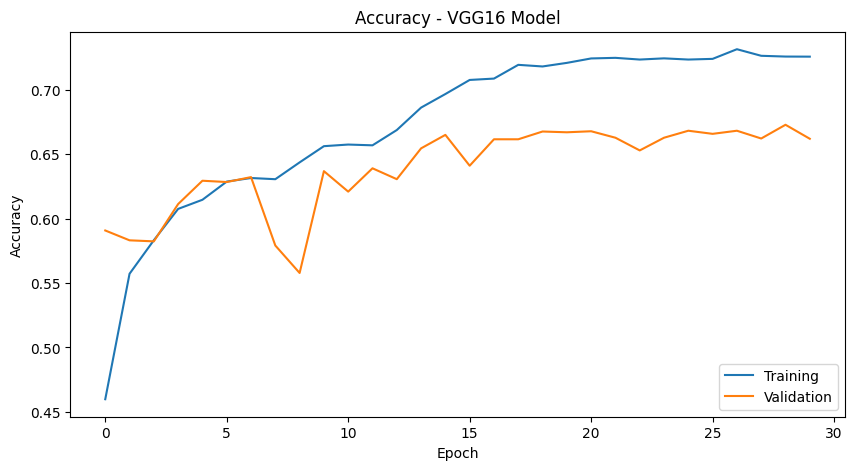

In [ ]:
# Plotting the accuracies

plt.figure(figsize = (10, 5))
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Accuracy - VGG16 Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

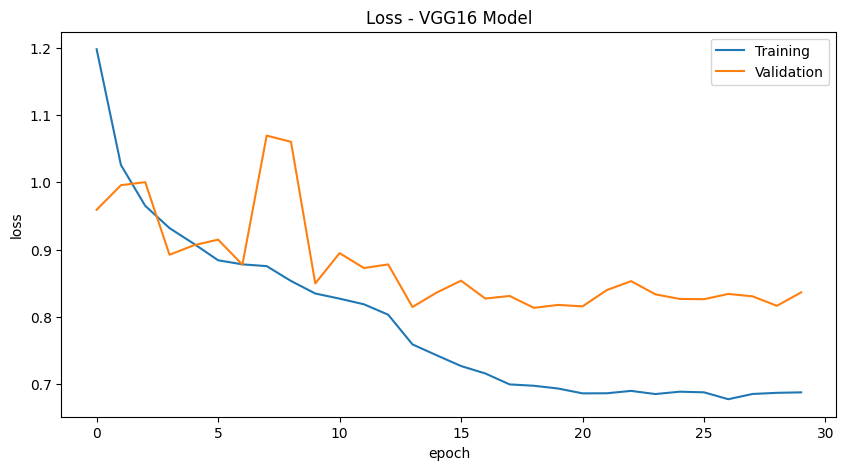

In [ ]:
# Plotting the losses

plt.figure(figsize = (10, 5))
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Loss - VGG16 Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### **Evaluating the VGG16 model**

In [ ]:
# Evaluating the model's performance on the test set
accuracy = model_3.evaluate(test_set_rgb)

4/4 [==============================] - 0s 63ms/step - loss: 0.7119 - accuracy: 0.7109


**Observations and Insights:**<br>
As imported and modified, our transfer learning model seems to perform similarly to our previous models developed above. After 29 epochs (best epoch), training accuracy stands at 0.72 and validation accuracy is 0.67. Accuracy and loss for both the training and validation data level off before early stopping ends the training. The model's performance on the test data stands at 0.66. These scores are roughly in line with the scores of Model 1, our baseline model.<br>

The VGG16 model was ultimately imported up to layer block4_pool, as it produced the best performance. A history of alternative models is below.




|  | Train Loss | Train Accuracy | Val Loss | Val Accuracy |
| --- | --- | --- | --- | --- |
| VGG16 block4_pool (selected) |0.71 | 0.72 | 0.80 | 0.67 |
| VGG16 block5_pool |1.05 | 0.54 | 1.10 | 0.52 |
| VGG16 block3_pool |0.79 | 0.69 | 0.77 | 0.66 |
| VGG16 block2_pool |0.71 | 0.71 | 0.82 | 0.65 |

<br>


## <span style="color:navy">Model 4: ResNet v2</span>


Our second transfer learning model is ResNet v2, which is a CNN trained on over 1 million images from the ImageNet database. ResNet v2 can classify images into 1,000 different categories. Like VGG16, colormode must be set to RGB to leverage this pre-trained architecture.

In [ ]:
Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet.summary()

171446536/171446536 [==============================] - 9s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                   

### **Model Building**
We have imported the ResNet v2 model up to layer 'conv_block23_add', as this has shown the best performance compared to other layers (discussed below). The ResNet v2 layers will be frozen, so the only trainable layers will be those we add ourselves. After flattening the input from 'conv_block23_add', we will add the same architecture we did earlier to VGG16, namely 2 dense layers, followed by a DropOut layer, another dense layer, and BatchNormalization. We will once again end with a softmax classifier, as this is a multi-class classification exercise.  

In [ ]:
transfer_layer = Resnet.get_layer('conv4_block23_add')
Resnet.trainable = False

# Flatten the input
x = Flatten()(transfer_layer.output)

# Dense layers
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)

# Classifier
pred = Dense(4, activation='softmax')(x)

# Initialize the model
model_4 = Model(Resnet.input, pred)

### **Compiling and Training the Model**

In [ ]:
# Creating a checkpoint which saves model weights from the best epoch
checkpoint = ModelCheckpoint('./model_4.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# Initiates early stopping if validation loss does not continue to improve
early_stopping = EarlyStopping(monitor = 'val_loss',
                              min_delta = 0,
                              patience = 15,    # Increased over initial models otherwise training is cut off too quickly
                              verbose = 1,
                              restore_best_weights = True)

# Initiates reduced learning rate if validation loss does not continue to improve
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                                        factor = 0.2,
                                        patience = 3,
                                        verbose = 1,
                                        min_delta = 0.0001)

callbacks_list = [checkpoint, early_stopping, reduce_learningrate]

In [ ]:
# Compiling model with optimizer set to Adam, loss set to categorical_crossentropy, and metrics set to accuracy
model_4.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
# Fitting model with epochs set to 30
history_4 = model_4.fit(train_set_rgb, validation_data = val_set_rgb, epochs = 30, callbacks = callbacks_list)

Epoch 1/30
473/473 [==============================] - ETA: 0s - loss: 1.4682 - accuracy: 0.2550
Epoch 1: val_accuracy improved from -inf to 0.22885, saving model to ./model_4.h5
473/473 [==============================] - 56s 97ms/step - loss: 1.4682 - accuracy: 0.2550 - val_loss: 1.4036 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 2/30
473/473 [==============================] - ETA: 0s - loss: 1.4057 - accuracy: 0.2567
Epoch 2: val_accuracy improved from 0.22885 to 0.24432, saving model to ./model_4.h5
473/473 [==============================] - 43s 91ms/step - loss: 1.4057 - accuracy: 0.2567 - val_loss: 1.4673 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 3/30
473/473 [==============================] - ETA: 0s - loss: 1.3985 - accuracy: 0.2616
Epoch 3: val_accuracy improved from 0.24432 to 0.36669, saving model to ./model_4.h5
473/473 [==============================] - 44s 94ms/step - loss: 1.3985 - accuracy: 0.2616 - val_loss: 1.3472 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 4/30
473/473 [==

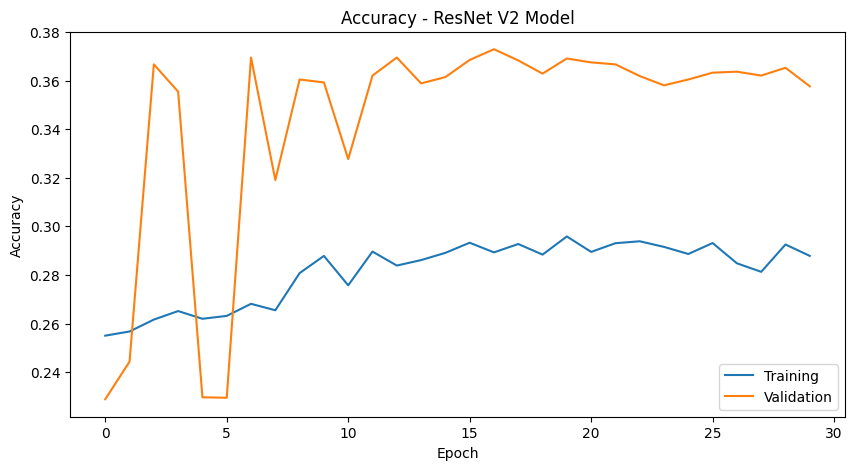

In [ ]:
# Plotting the accuracies

plt.figure(figsize = (10, 5))
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Accuracy - ResNet V2 Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

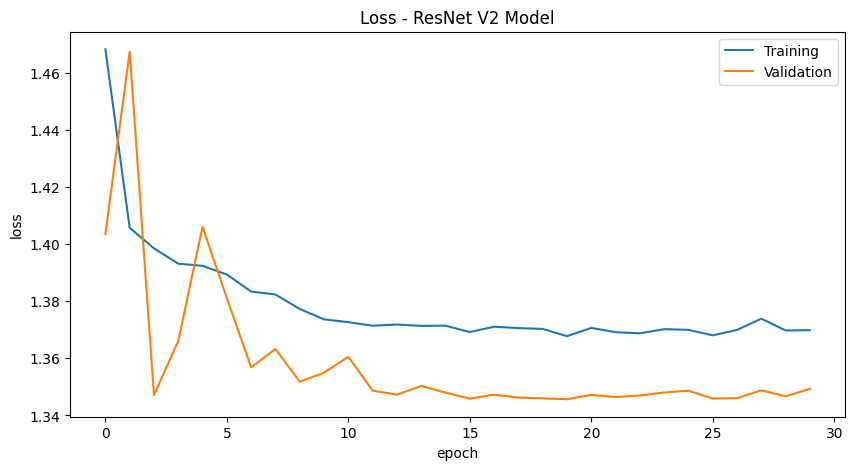

In [ ]:
# Plotting the losses

plt.figure(figsize = (10, 5))
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Loss - ResNet V2 Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### **Evaluating the ResNet Model**

In [ ]:
# Evaluating the model's performance on the test set
accuracy = model_4.evaluate(test_set_rgb)

4/4 [==============================] - 0s 65ms/step - loss: 1.3993 - accuracy: 0.2266


**Observations and Insights:**<br>
As imported and modified, our transfer learning model shows terrible performance. After just 1 epoch (the 'best' epoch!), training accuracy stands at 0.26 and validation accuracy is 0.36. Accuracy and loss for both training and validation data level off fairly quickly at which point early stopping aborts the training. The above accuracy and loss curves paint the picture of poor model that will not generalize well at all. The model's test accuracy comes in at 0.34.

The ResNet v2 model was ultimately imported up to layer 'conv4_block23_add', as it produced the 'best' performance, though it was difficult to choose. A history of alternative models is below.

|  | Train Loss | Train Accuracy | Val Loss | Val Accuracy |
| --- | --- | --- | --- | --- |
| ResNet V2 conv4_block23_add (selected) |1.43 | 0.26 | 1.35 | 0.36 |
| ResNet V2 conv5_block3_add |1.47 | 0.23 | 1.43 | 0.33 |
| ResNet V2 conv3_block4_add |1.49 | 0.22 | 1.44 | 0.33 |
| ResNet V2 conv2_block3_add |1.51 | 0.21 | 1.55 | 0.21 |

<br>

## <span style="color:navy">Model 5: EfficientNet</span>


Our third transfer learning model is EfficientNet, which is a CNN that uses 'compound scaling' to improve efficiency and, theoretically at least, performance. Like VGG16 and ResNet v2, color_mode must be set to RGB to leverage this pre-trained architecture.

In [ ]:
EfficientNet = ap.EfficientNetV2B2(include_top=False, weights="imagenet", input_shape= (48, 48, 3))
EfficientNet.summary()

35839040/35839040 [==============================] - 3s 0us/step
Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_3[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 48, 48, 3)            0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2

### **Model Building**
We have imported the EfficientNet Model up to layer 'block5f_expand_activation', as this has shown the best performance compared to other layers (discussed below). The EfficientNet layers will be frozen, so the only trainable layers will be those that we add ourselves. After flattening the input from 'block5f_expand_activation', we will add the same architecture we did earlier to the VGG16 and ResNet v2 models, namely 2 dense layers, followed by a Dropout layer, another dense layer, and BatchNormalization. We will end with a softmax classifier.


In [ ]:
transfer_layer_EfficientNet = EfficientNet.get_layer('block5f_expand_activation')
EfficientNet.trainable = False

# Flatten the input
x = Flatten()(transfer_layer_EfficientNet.output)

# Dense layers
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)

# Classifier
pred = Dense(4, activation='softmax')(x)

# Initialize the model
model_5 = Model(EfficientNet.input, pred)

### **Compiling and Training the Model**

In [ ]:
# Creating a checkpoint which saves model weights from the best epoch
checkpoint = ModelCheckpoint('./model_5.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# Initiates early stopping if validation loss does not continue to improve
early_stopping = EarlyStopping(monitor = 'val_loss',
                              min_delta = 0,
                              patience = 12,
                              verbose = 1,
                              restore_best_weights = True)

# Initiates reduced learning rate if validation loss does not continue to improve
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                                        factor = 0.2,
                                        patience = 3,
                                        verbose = 1,
                                        min_delta = 0.0001)

callbacks_list = [checkpoint, early_stopping, reduce_learningrate]

In [ ]:
# Compiling model with optimizer set to Adam, loss set to categorical_crossentropy, and metrics set to accuracy
model_5.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
# Fitting model with epochs set to 30
history_5 = model_5.fit(train_set_rgb, validation_data = val_set_rgb, epochs = 30, callbacks = callbacks_list)

Epoch 1/30
473/473 [==============================] - ETA: 0s - loss: 1.4565 - accuracy: 0.2562
Epoch 1: val_accuracy improved from -inf to 0.36669, saving model to ./model_5.h5
473/473 [==============================] - 48s 85ms/step - loss: 1.4565 - accuracy: 0.2562 - val_loss: 1.3534 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 2/30
472/473 [============================>.] - ETA: 0s - loss: 1.4052 - accuracy: 0.2599
Epoch 2: val_accuracy did not improve from 0.36669
473/473 [==============================] - 38s 80ms/step - loss: 1.4053 - accuracy: 0.2599 - val_loss: 1.3530 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 3/30
472/473 [============================>.] - ETA: 0s - loss: 1.3980 - accuracy: 0.2639
Epoch 3: val_accuracy did not improve from 0.36669
473/473 [==============================] - 38s 81ms/step - loss: 1.3980 - accuracy: 0.2639 - val_loss: 1.3882 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 4/30
472/473 [============================>.] - ETA: 0s - loss: 1.3965 - accuracy: 0

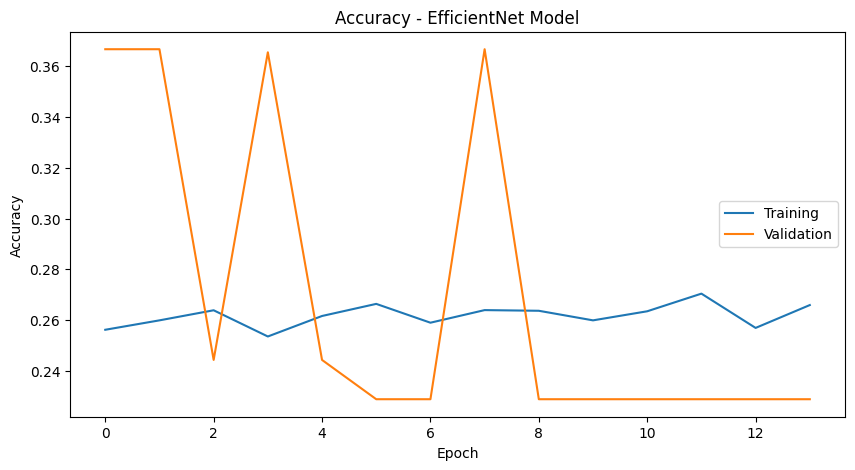

In [ ]:
# Plotting the accuracies

plt.figure(figsize = (10, 5))
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Accuracy - EfficientNet Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='center right')
plt.show()

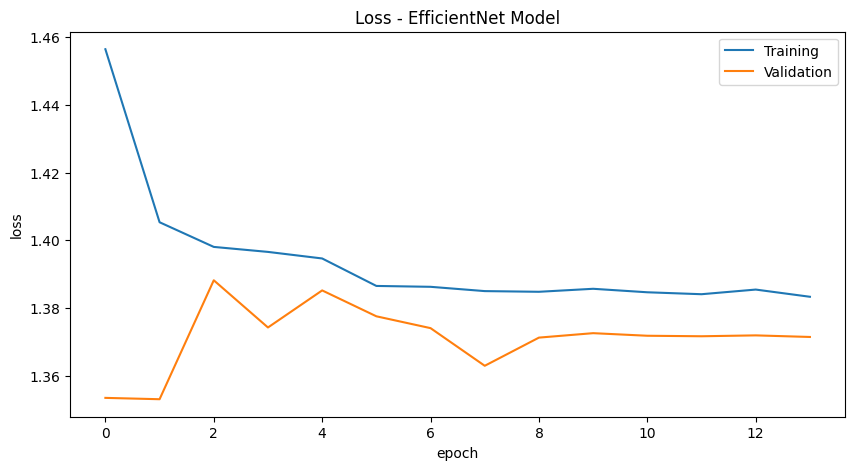

In [ ]:
# Plotting the losses

plt.figure(figsize = (10, 5))
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('Loss - EfficientNet Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### **Evaluating the EfficientNet Model**

In [ ]:
# Evaluating the model's performance on the test set
accuracy = model_5.evaluate(test_set_rgb)

4/4 [==============================] - 0s 54ms/step - loss: 1.4028 - accuracy: 0.2500


**Observations and Insights:**<br>
As imported and modified, this model performs poorly. After just 4 epochs (the 'best' epoch), training accuracy stands at 0.26 and validation accuracy is 0.24. Training and validation accuracy are almost immediately horizontal. Loss declines a bit before leveling off. With test accuracy coming in at 0.25, it makes the model no better than random guessing. We could build a model that classifies every single image as 'happy', and with our evenly distributed test set, it would produce the same 0.25 accuracy as our EfficientNet model.

Again, it was difficult to select a 'best' layer from which to import the EfficientNet model. A history of alternative models is below.


|  | Train Loss | Train Accuracy | Val Loss | Val Accuracy |
| --- | --- | --- | --- | --- |
| EfficientNet block5f_expand_activation (selected) |1.39 | 0.26 | 1.37 | 0.24 |
| EfficientNet block6e_expand_activation |1.53 | 0.25 | 1.45 | 0.22 |
| EfficientNet block4a_expand_activation |1.42 | 0.25 | 1.42 | 0.21 |
| EfficientNet block3c_expand_activation |1.47 | 0.26 | 1.44 | 0.22 |

<br>


**Overall Observations and Insights on Transfer Learning Models:**<br>
* As outlined above, the performance of these transfer learning models varied greatly. While the VGG16 model performed admirably (see table below), the ResNet v2 and EfficientNet models left much to be desired in terms of stability and performance.
* On the whole, none of the transfer learning models performed better than our baseline and 2nd generation models, which was surprising.
* Model complexity seems to have played a role in performance, as the VGG16 model has a much less complex architecture than both the ResNet v2 and the EfficientNet models. Perhaps overly-complex models trained on millions of large, color images do not perform as well on smaller, black and white images from just 4 classes.
    * VGG16, with 14.7 million parameters, is a fairly straightforward architecture, with just 19 layers from the input layer to the max import layer, 'block5_pool'.
    * ResNet v2, with 42.7 million parameters, is a much more complex architecture, with a whopping 345 layers from the input layer to the max import layer, 'conv5_block3_out'.
    * EfficientNet, with 'just' 8.8 million parameters, contains 349 layers from the input layer to the max import layer, 'top_activation'.
* As evidenced by the table below, it would appear that the unsatisfactory performance of the transfer learning models may have more to do with their complexity than the fact that they require a colormode of RGB. The baseline and 2nd generation RGB models both performed just as well as the VGG16 model. It would seem that the downfall of ResNet v2 and EfficientNet was their complex architecture. Quite simply, the simpler models performed better. In fact, the highest performing model so far, the 2nd generation grayscale model (Model 2.1), has the smallest number of parameters.
* Perhaps a sweet spot exists somewhere between the simplicity of our 2nd generation grayscale model and the much more complex transfer learning models we have explored thus far. If it is possible to increase the complexity of our 2nd generation grayscale model while keeping the overall complexity from ballooning too far in the direction of the transfer learning models, we may find ourselves a successful model.
    

|  | Parameters | Train Loss | Train Accuracy | Val Loss | Val Accuracy | Test Accuracy |
| --- | --- | --- | --- | --- | --- | --- |
| **Model 1.1**: Baseline Grayscale | 605,060 | 0.68 | 0.72 | 0.78 | 0.68 | 0.65 |
| **Model 1.2**: Baseline RGB | 605,572 | 0.68 | 0.72 | 0.78 | 0.68 | 0.63 |
| **Model 2.1**: 2nd Gen Grayscale | 455,780 | 0.54 | 0.78 | 0.74 | 0.71 | 0.69 |
| **Model 2.2**: 2nd Gen RGB | 457,828 | 0.59 | 0.76 | 0.72 | 0.71 | 0.68 |
| **Model 3**: VGG16 | 14,714,688 | 0.71 | 0.72 | 0.80 | 0.67 | 0.66 |
| **Model 4**: ResNet V2 | 42,658,176 | 1.43 | 0.26 | 1.35 | 0.36 | 0.28 |
| **Model 5**: EfficientNet | 8,769,374 | 1.39 | 0.26 | 1.37 | 0.24 | 0.25 |

<br>

# <span style="color:navy">Milestone 1</span>
## <span style="color:navy">Model 6: Complex Neural Network Architecture</span>


As previewed above, it is time to expand our 2nd generation grayscale model to see if we can improve performance. Grayscale slightly outperformed RGB in our first two models, so we will leave RGB behind and proceed with color_mode set to grayscale.


## **Creating our Data Loaders**

As we are proceeding with a colormode set to grayscale, we will create new data loaders for our more complex CNN, Model 6. As our data augmentation takes place when we instantiate an ImageDataGenerator object, it is convenient to create data loaders specific to our new model so we can easily finetune our hyperparameters as needed. The ImageDataGenerators below include the parameters of the final Milestone 1 model, the highest performing CNN thus far. They were chosen after exhaustive finetuning of the model, as discussed later.<br>
* Batch size is set to 32. The model was tested with batch sizes of 16, 32, 45, 64, and 128. A batch size of 32 performed the best. The smaller the batch size, the longer training took. The larger the batch size, the faster the training process, though the accuracy and loss bounced around significantly, offsetting the increased speed.
* **horizontal_flip** is set to 'True'. As some faces in the images face left while others face right or straight ahead, flipping the training images improves our model's ability to learn that horizontal orientation should not affect the eventual classification.
* **rescale** is equal to 1./255, which normalizes the pixel values to a number between 0 and 1. This helps to prevent vanishing and exploding gradients in our network by keeping the numbers small and manageable.
* **brightness_range** is set to '0.7,1.3'. A setting of 1 results in images remaining unchanged. As the number approaches zero, the images become darker. As the number approaches 2, the images become lighter. As many of the images are already very dark or very light, limiting this setting to a relatively small range around 1 will help our model learn to deal with varying pixel values without rendering some images completely unusable.
* **rotation_range** is set to 25, meaning the images may randomly be rotated up to 25 degrees. Similar to flipping the images horizontally, this rotation will help the model learn that the angle of a face is not an important feature.
* Additional data augmentation methods were attempted and later removed after failing to significantly improve model performance. Among those tested were **width_shift_range**, **height_shift_range**, **shear_range**, and **zoom_range**.

In [ ]:
batch_size  = 32

# Creating ImageDataGenerator objects for grayscale colormode
datagen_train_grayscale = ImageDataGenerator(horizontal_flip = True,
                                             rescale = 1./255,
                                             brightness_range = (0.7,1.3),
                                             rotation_range=25)

datagen_validation_grayscale = ImageDataGenerator(horizontal_flip = True,
                                                  rescale = 1./255,
                                                  brightness_range = (0.7,1.3),
                                                  rotation_range=25)

datagen_test_grayscale = ImageDataGenerator(horizontal_flip = True,
                                            rescale = 1./255,
                                            brightness_range = (0.7,1.3),
                                            rotation_range=25)


# Creating train, validation, and test sets for grayscale colormode

print("Grayscale Images")

train_set_grayscale = datagen_train_grayscale.flow_from_directory(dir_train,
                        target_size = (img_size, img_size),
                        color_mode = "grayscale",
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                        seed = 42,
                        shuffle = True)

val_set_grayscale = datagen_validation_grayscale.flow_from_directory(dir_validation,
                        target_size = (img_size, img_size),
                        color_mode = "grayscale",
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                        seed = 42,
                        shuffle = True)

test_set_grayscale = datagen_test_grayscale.flow_from_directory(dir_test,
                        target_size = (img_size, img_size),
                        color_mode = "grayscale",
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                        seed = 42,
                        shuffle = True)


Grayscale Images
Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

The structure of the Milestone 1 model (Model 6) is below. Many configurations were tested, and the following architecture led to the best performance.
* The model begins with an input layer accepting an input shape of '48,48,1', given that our color_mode has been set to grayscale.
* There are 5 convolutional blocks with relu activation. Each block contains BatchNormalization, LeakyReLU, and MaxPooling layers. The first, second, and fourth blocks include a layer of GaussianNoise, while the third and fifth layers each include a Dropout layer.
* The output of the fifth convolutional block is then flattened, and fed into 2 dense layers which include additional BatchNormalization and Dropout layers.
* The architecture is completed with a softmax classifier, as this model is designed for multi-class classification. Test images will be classified as either happy, sad, neutral, or surprise.
* The model contains 2.1 million parameters, making it more complex than our 2nd generation grayscale model, but not as complex as the transfer learning models, whose complexity appeared to hurt their performance.


In [ ]:
# Creating a Sequential model
model_6 = Sequential()

# Convolutional Block #1
model_6.add(Conv2D(64, (3, 3), input_shape = (48, 48, 1), activation='relu', padding = 'same'))
model_6.add(BatchNormalization())
model_6.add(LeakyReLU(alpha = 0.1))
model_6.add(MaxPooling2D(2, 2))
model_6.add(GaussianNoise(0.1))

# Convolutional Block #2
model_6.add(Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model_6.add(BatchNormalization())
model_6.add(LeakyReLU(alpha = 0.1))
model_6.add(MaxPooling2D(2, 2))
model_6.add(GaussianNoise(0.1))

# Convolutional Block #3
model_6.add(Conv2D(512, (2, 2), activation='relu', padding = 'same'))
model_6.add(BatchNormalization())
model_6.add(LeakyReLU(alpha = 0.1))
model_6.add(MaxPooling2D(2, 2))
model_6.add(Dropout(0.1))

# Convolutional Block #4
model_6.add(Conv2D(512, (2, 2), activation='relu', padding = 'same'))
model_6.add(BatchNormalization())
model_6.add(LeakyReLU(alpha = 0.1))
model_6.add(MaxPooling2D(2, 2))
model_6.add(GaussianNoise(0.1))

# Convolutional Block #5
model_6.add(Conv2D(256, (2, 2), activation='relu', padding = 'same'))
model_6.add(BatchNormalization())
model_6.add(LeakyReLU(alpha = 0.1))
model_6.add(MaxPooling2D(2, 2))
model_6.add(Dropout(0.1))

# Flatten layer
model_6.add(Flatten())

# Dense layers
model_6.add(Dense(256, activation = 'relu'))
model_6.add(BatchNormalization())
model_6.add(Dropout(0.1))

model_6.add(Dense(512, activation = 'relu'))
model_6.add(BatchNormalization())
model_6.add(Dropout(0.05))

# Classifier
model_6.add(Dense(4, activation = 'softmax'))

model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_11 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 gaussian_noise (GaussianNo  (None, 24, 24, 64)        0         
 ise)                                                            
                                                      

### **Compiling and Training the Model**

In [ ]:
# Creating a checkpoint which saves model weights from the best epoch
checkpoint = ModelCheckpoint('./model_6.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# Initiates early stopping if validation loss does not continue to improve
early_stopping = EarlyStopping(monitor = 'val_loss',
                              min_delta = 0,
                              patience = 10,
                              verbose = 1,
                              restore_best_weights = True)

# Initiates reduced learning rate if validation loss does not continue to improve
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                                        factor = 0.2,
                                        patience = 3,
                                        verbose = 1,
                                        min_delta = 0.0001)

callbacks_list = [checkpoint, early_stopping, reduce_learningrate]

In [ ]:
# Compiling model with optimizer set to Adam, loss set to categorical_crossentropy, and metrics set to accuracy
model_6.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
# Fitting model with epochs set to 30
history_6 = model_6.fit(train_set_grayscale, validation_data = val_set_grayscale, epochs = 30, callbacks = callbacks_list)

Epoch 1/30
472/473 [============================>.] - ETA: 0s - loss: 1.4735 - accuracy: 0.3456
Epoch 1: val_accuracy improved from -inf to 0.29717, saving model to ./model_6.h5
473/473 [==============================] - 34s 59ms/step - loss: 1.4728 - accuracy: 0.3458 - val_loss: 1.4489 - val_accuracy: 0.2972 - lr: 0.0010
Epoch 2/30
473/473 [==============================] - ETA: 0s - loss: 1.1860 - accuracy: 0.4629
Epoch 2: val_accuracy improved from 0.29717 to 0.35986, saving model to ./model_6.h5
473/473 [==============================] - 28s 58ms/step - loss: 1.1860 - accuracy: 0.4629 - val_loss: 1.5053 - val_accuracy: 0.3599 - lr: 0.0010
Epoch 3/30
473/473 [==============================] - ETA: 0s - loss: 1.0208 - accuracy: 0.5536
Epoch 3: val_accuracy improved from 0.35986 to 0.58127, saving model to ./model_6.h5
473/473 [==============================] - 32s 67ms/step - loss: 1.0208 - accuracy: 0.5536 - val_loss: 0.9778 - val_accuracy: 0.5813 - lr: 0.0010
Epoch 4/30
472/473 [==

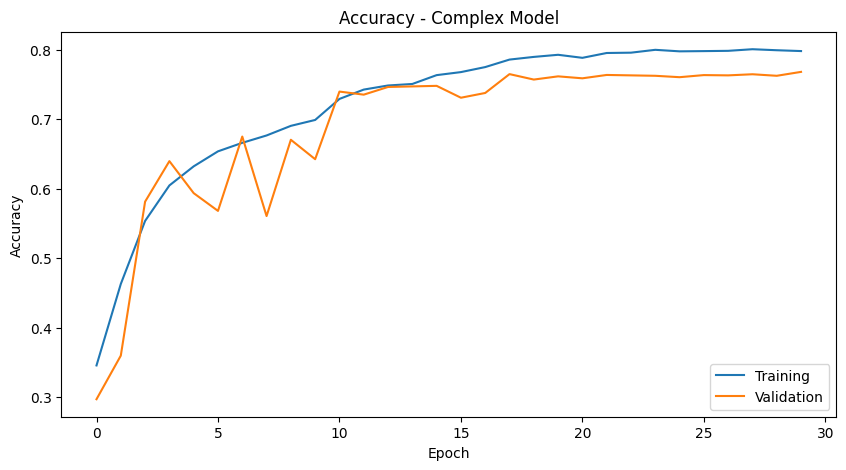

In [ ]:
# Plotting the accuracies

plt.figure(figsize = (10, 5))
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('Accuracy - Complex Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

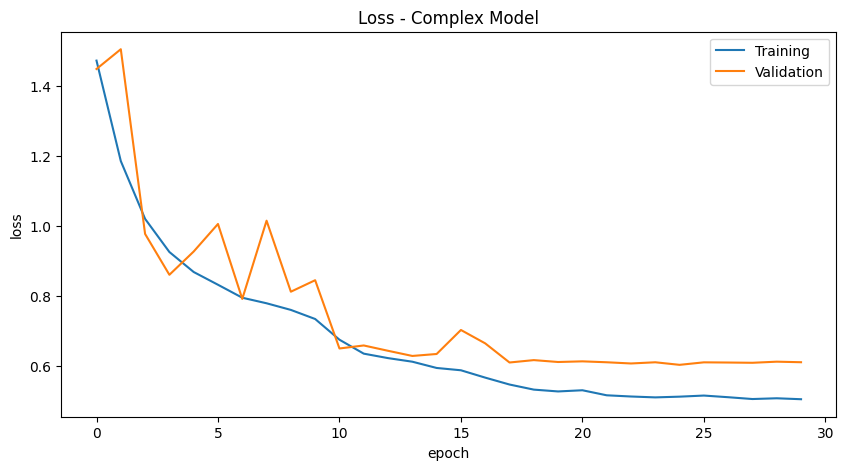

In [ ]:
# Plotting the losses

plt.figure(figsize = (10, 5))
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('Loss - Complex Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### **Evaluating the Model on Test Set**

In [ ]:
# Evaluating the model's performance on the test set
accuracy = model_6.evaluate(test_set_grayscale)

4/4 [==============================] - 0s 34ms/step - loss: 0.5075 - accuracy: 0.8438


**Observations and Insights:**<br>
Model 6, our Milestone 1 model, outperforms all previous models. After 33 epochs (best epoch), training accuracy stands at 0.79 and validation accuracy is 0.76. Accuracy and loss for both training and validation data improve similarly before leveling off. The model begins to overfit around epoch 15, but the overfitting is not as severe as previous models. The test accuracy for this model is 0.76. Overall, Model 6 generalizes better than previous models, and is the top performer thus far. That said, **it is still an overfitting model, and thus it would not be advisable to deploy this model as is**.

This model underwent numerous transformations before arriving at its final state. Parameters were tuned, layers were added, layers were removed, and eventually the above model was determined to be the best iteration. An abridged history of model development can be found in the table below.

The starting point for our final model was as follows:

**CONVOLUTIONAL BLOCK #1**
* Conv2D(64,(2,2), input shape = (48,48,1), activation = 'relu', padding = 'same')
* BatchNormalization
* LeakyReLU(alpha = 0.1)
* MaxPooling2D(2,2)<br>


**CONVOLUTIONAL BLOCK #2**
* Conv2D(128,(2,2), activation = 'relu', padding = 'same')
* BatchNormalization
* LeakyReLU(alpha = 0.1)
* MaxPooling2D(2,2)<br>


**CONVOLUTIONAL BLOCK #3**
* Conv2D(512,(2,2), activation = 'relu', padding = 'same')
* BatchNormalization
* LeakyReLU(alpha = 0.1)
* MaxPooling2D(2,2)<br>


**CONVOLUTIONAL BLOCK #4**
* Conv2D(256,(2,2), activation = 'relu', padding = 'same')
* BatchNormalization
* LeakyReLU(alpha = 0.1)
* MaxPooling2D(2,2)<br>


**CONVOLUTIONAL BLOCK #5**
* Conv2D(128,(2,2), activation = 'relu', padding = 'same')
* BatchNormalization
* LeakyReLU(alpha = 0.1)
* MaxPooling2D(2,2)<br>


**FINAL LAYERS**
* Flatten
* Dense(256, activation = 'relu')
* Dropout(0.1)
* Dense(256, activation = 'relu')
* Dropout(0.1)
* Dense(4, activation = 'softmax')


**PARAMETERS**
* Batch size = 32
* horizontal_flip = True
* rescale = 1./255
* brightness_range = (0.0,2.0)
* shear_range = 0.3


Below is an abridged summary of actions taken to improve the model. In many cases, parameters or layers were adjusted, added, or removed, just to be returned to their original state when the desired or experimental impact was not realized. The model went through dozens of iterations, with the following transformations being the most impactful.  

|  Action Taken | Train Loss | Train Accuracy | Val Loss | Val Accuracy |
| --- | --- | --- | --- | --- |
| Starting model as outlined above | 0.77 | 0.70 | 0.89 | 0.58 |
| Dropout(0.1) layers added to conv blocks 1 and 5 to reduce overfitting |0.75 | 0.74 | 0.66 | 0.61 |
| Shear_range removed entirely to determine effect |0.76 | 0.74 | 0.68 | 0.60 |
| Rotation_range added and optimized |0.74 | 0.74 | 0.62 | 0.61 |
| Additional dropout layers added to blocks 2 and 4 |0.59 | 0.78 | 0.64 | 0.68 |
| Number of neurons in final dense layer set to 512 |0.68 | 0.71 | 0.62 | 0.71 |
| Number of neurons in block 4 increased to 512 |0.70 | 0.73 | 0.60 | 0.74 |
| Dropout layers swapped out for GaussianNoise in blocks 1 and 2 |0.61 | 0.74 | 0.57 | 0.75 |
| Brightness_range narrowed to (0.5,1.5) then to (0.7,1.3) |0.59 | 0.75 | 0.60 | 0.75 |
| Kernel size enlarged to 3x3 in first then also second block |0.55 | 0.78 | 0.57 | 0.75 |
| Dropout in block 5 reduced to 0.5, resulting in final model |0.54 | 0.79 | 0.60 | 0.76 |

<br>


# <span style="color:navy">Final Solution</span>
## <span style="color:navy">Model 7: Goodbye Overfitting</span>


While Model 6 was an improvement on previous models, it was still overfitting the training data. In order to feel comfortable recommending a model for deployment in the context of this project, we need to improve on Model 6. Model 7 is an attempt to develop a deployable CNN. We want our model to have high accuracy, while also maintaining a good fit (no overfitting/underfitting) and generalizing well to the unseen test data. We will continue with color_mode set to grayscale for the reasons already noted: slightly better performance, slightly fewer parameters, slightly lower computational expense, and the image data itself is already grayscale.

## **Creating our Data Loaders**

We will once again be creating new data loaders for Model 7. As mentioned earlier, since our data augmentation takes place when we instantiate an ImageDataGenerator object, it is convenient to create data loaders specific to our new model so we can easily finetune our hyperparameters as needed. The ImageDataGenerators below include the parameters of our final, highest performing iteration of the model. They were once again chosen after exhaustive finetuning, as discussed later.<br>
* Batch size is set to 128. The model was tested with batch sizes of 16, 32, 64, 128, and 256. A batch size of 128 performed the best. The smallest batch sizes seemed to get stuck in an accuracy range of 25-30% (perhaps a local minimum), while the other sizes did not generalize as well to the test data.
* **horizontal_flip** is set to 'True'. As some faces in the images face left while others face right or straight ahead, flipping the training images improves our model's ability to learn that horizontal orientation should not affect the eventual classification.
* **rescale** is equal to 1./255, which normalizes the pixel values to a number between 0 and 1. This helps to prevent vanishing and exploding gradients in our network by keeping the numbers small and manageable.
* **brightness_range** is set to '0.0,2.0'. This is a change from Model 6 where we used a narrower range. A narrower range did not help within the architecture of Model 7, and the broader range showed better performance.
* **shear_range** is set to 0.3, which matches the settings of our baseline models. This parameter essentially distorts the image along an axis in a counter-clockwise direction.
* **one-hot-encoding** is handled by setting **class_mode** to "categorical", followed by our list of classes.
* Additional data augmentation methods were attempted and later removed after failing to significantly improve model performance. Among those tested were **width_shift_range**, **height_shift_range**, **rotation_range**, **zca_whitening**, **zoom_range**, and even **vertical_flip**.

In [ ]:
batch_size  = 128

# Creating ImageDataGenerator objects for grayscale colormode
datagen_train_grayscale = ImageDataGenerator(rescale=1./255,
                                             brightness_range=(0.0,2.0),
                                             horizontal_flip=True,
                                             shear_range=0.3)


datagen_validation_grayscale = ImageDataGenerator(rescale=1./255,
                                             brightness_range=(0.0,2.0),
                                             horizontal_flip=True,
                                             shear_range=0.3)


datagen_test_grayscale = ImageDataGenerator(rescale=1./255,
                                             brightness_range=(0.0,2.0),
                                             horizontal_flip=True,
                                             shear_range=0.3)



# Creating train, validation, and test sets for grayscale colormode

print("Grayscale Images")

train_set_grayscale = datagen_train_grayscale.flow_from_directory(dir_train,
                        target_size = (img_size, img_size),
                        color_mode = "grayscale",
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                        seed = 42,
                        shuffle = True)

val_set_grayscale = datagen_validation_grayscale.flow_from_directory(dir_validation,
                        target_size = (img_size, img_size),
                        color_mode = "grayscale",
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                        seed = 42,
                        shuffle = False)

test_set_grayscale = datagen_test_grayscale.flow_from_directory(dir_test,
                        target_size = (img_size, img_size),
                        color_mode = "grayscale",
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                        seed = 42,
                        shuffle = False)


Grayscale Images
Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

The structure of Model 7 is below. Rather than simply modifying Model 6, the development of Model 7 entailed going back to the drawing board and devising a new strategy. Many configurations were tested, and the following architecture led to the best, most generalizable performance.
* The model begins with an input layer accepting an input shape of '48,48,1', given that our color_mode has been set to grayscale.
* There are 3 similar convolutional blocks with relu activation. Padding is no longer set to "same", as this increased the generalization gap. Each block contains a BatchNormalization layer before its first and second convolutional layers (except the input layer in Block #1). Each block ends with MaxPooling and a Dropout layer set to 0.4.
* A "secret" block, which is what eventually closed the generalization gap and eliminated overfitting, is essentially a normalization/regularization block consisting of a BatchNormalization layer and a convolutional layer without activation, but instead with a L2 regularization set to 0.025. This is followed by another BatchNormalization layer.
* The output of the "secret" block is then flattened, and fed into 2 dense layers, each followed by a Dropout layer, and separated by a layer of GaussianNoise.
* The architecture is completed with a softmax classifier, as this model is designed for multi-class classification. Test images will be classified as either happy, sad, neutral, or surprise.
* The final model contains 1.8 million parameters and 27 layers, making it slightly less complex than Model 6, while still substantially more complex than our initial models.

In [ ]:
# Creating a Sequential model
model_7 = Sequential()

# Convolutional Block #1
model_7.add(Conv2D(64, (3, 3), input_shape = (48, 48, 1), activation = 'relu'))
model_7.add(BatchNormalization())
model_7.add(Conv2D(64, (3, 3), activation = 'relu'))
model_7.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_7.add(Dropout(0.4))

# Convolutional Block #2
model_7.add(BatchNormalization())
model_7.add(Conv2D(128, (3, 3), activation='relu'))
model_7.add(BatchNormalization())
model_7.add(Conv2D(128, (3, 3), activation='relu'))
model_7.add(MaxPooling2D(pool_size = (2, 2), strides=(2,2)))
model_7.add(Dropout(0.4))

# Convolutional Block #3
model_7.add(BatchNormalization())
model_7.add(Conv2D(128, (3, 3), activation='relu'))
model_7.add(BatchNormalization())
model_7.add(Conv2D(128, (3, 3), activation='relu'))
model_7.add(MaxPooling2D(pool_size = (2, 2), strides=(2,2)))
model_7.add(Dropout(0.4))

# SECRET LEVEL
model_7.add(BatchNormalization())
model_7.add(Conv2D(128, (2, 2), kernel_regularizer = l2(0.025)))
model_7.add(BatchNormalization())

# Flatten layer
model_7.add(Flatten())

# Dense layers
model_7.add(Dense(1024, activation = 'relu'))
model_7.add(Dropout(0.2))
model_7.add(GaussianNoise(0.1))
model_7.add(Dense(1024, activation = 'relu'))
model_7.add(Dropout(0.2))

# Classifier
model_7.add(Dense(4, activation = 'softmax'))

model_7.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 batch_normalization_18 (Ba  (None, 46, 46, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_26 (Conv2D)          (None, 44, 44, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 22, 22, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 22, 22, 64)        0         
                                                                 
 batch_normalization_19 (Ba  (None, 22, 22, 64)       

### **Compiling and Training the Model**

In [ ]:
# Creating a checkpoint which saves model weights from the best epoch
checkpoint = ModelCheckpoint('./model_7.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# Initiates early stopping if validation loss does not continue to improve
early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

# Slows the learning rate when validation loss does not improve
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 2,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [checkpoint, early_stopping, reduce_learningrate]

**Note:**<br>
* Early stopping patience is set to 5 epochs. This model was trained with Patience set to 5, 10, 12, 15, 20, and 50. Each time, the model achieved the same results, so the simpler model (patience = 5) was chosen.
* Reduce learning rate patience is set to 2 epochs. Again, the model was trained with patience set to 1, 2, 3, and 5. The results varied considerably, with 2 epochs being the only iteration that did not result in a generalization gap.


In [ ]:
# Compiling model with optimizer set to Adam, loss set to categorical_crossentropy, and metrics set to accuracy
model_7.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting model with epochs set to 200
history_7 = model_7.fit(train_set_grayscale, validation_data = val_set_grayscale, epochs = 200, callbacks = callbacks_list)

Epoch 1/200
119/119 [==============================] - ETA: 0s - loss: 2.5025 - accuracy: 0.2924
Epoch 1: val_accuracy improved from -inf to 0.36669, saving model to ./model_7.h5
119/119 [==============================] - 30s 199ms/step - loss: 2.5025 - accuracy: 0.2924 - val_loss: 1.5811 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 2/200
119/119 [==============================] - ETA: 0s - loss: 1.3181 - accuracy: 0.4560
Epoch 2: val_accuracy did not improve from 0.36669
119/119 [==============================] - 28s 233ms/step - loss: 1.3181 - accuracy: 0.4560 - val_loss: 1.5257 - val_accuracy: 0.2445 - lr: 0.0010
Epoch 3/200
119/119 [==============================] - ETA: 0s - loss: 1.1302 - accuracy: 0.5341
Epoch 3: val_accuracy did not improve from 0.36669
119/119 [==============================] - 22s 183ms/step - loss: 1.1302 - accuracy: 0.5341 - val_loss: 1.4221 - val_accuracy: 0.3100 - lr: 0.0010
Epoch 4/200
119/119 [==============================] - ETA: 0s - loss: 1.0656 - accu

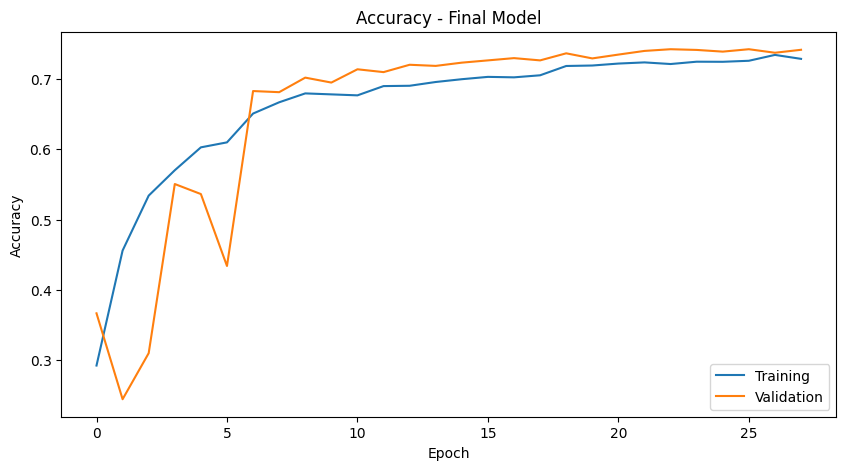

In [ ]:
# Plotting the accuracies

plt.figure(figsize = (10, 5))
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('Accuracy - Final Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

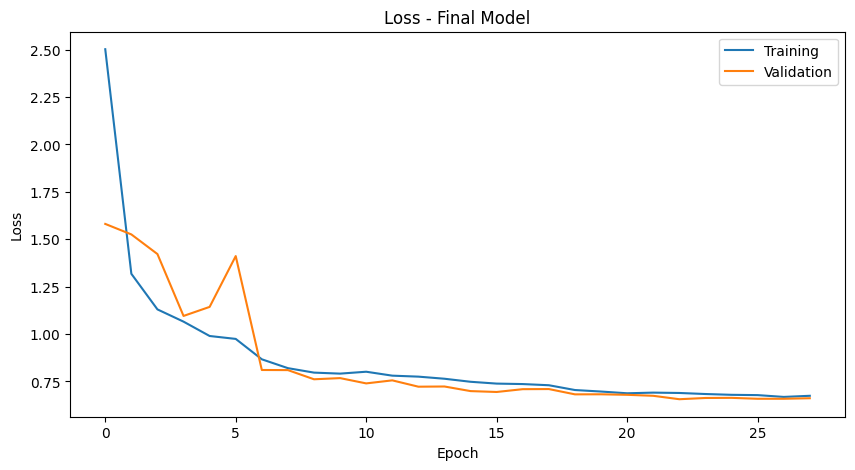

In [ ]:
# Plotting the losses

plt.figure(figsize = (10, 5))
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('Loss - Final Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### **Evaluating the Model on Test Set**

In [ ]:
# Evaluating the model's performance on the test set
accuracy = model_7.evaluate(test_set_grayscale)

1/1 [==============================] - 0s 157ms/step - loss: 0.7069 - accuracy: 0.7500


**Observations and Insights:**<br>

Model 7, rewarding us for all of our efforts, displays the best all-around performance. Accuracies for training, validation, and test data are stable at 0.75, while loss is stable across training, validation, and test data at roughly 0.63 (0.62 to 0.64). As evidenced by the above graphs, there is no noticeable generalization gap. The accuracy and loss curves move more or less in tandem, leveling off around epoch 25 and remaining together from that point forward. The model does not overfit or underfit the training data. The images below show the accuracy and loss curves for the same model run out to 115 epochs. The model converges at reasonable levels of accuracy and loss, and it generalizes well. <br><br>


<table><tr>
<td> <img src="Accuracy_Patience_50.png" alt="Drawing" style="width: 600px;"/> </td>
<td> <img src="Loss_Patience_50.png" alt="Drawing" style="width: 600px;"/> </td>
</tr></table>

<br>
Much like Model 6, this model underwent numerous transformations before arriving at its final state. Parameters were tuned, layers were added, others were removed, and in the end, the above iteration of the model was determined to be the best. Below are the impacts that some of the most important aspects of the model have on its overall performance. While some individual metrics may be better than those of the final model, each of the modifications below, if taken individually or in tandem, results in a generalization gap that is not present in the final model.





|  Model Changes | Train Loss | Train Accuracy | Val Loss | Val Accuracy |
| --- | --- | --- | --- | --- |
| Final Model | 0.63 | 0.75 | 0.64 | 0.75 |
| Remove "regularization" block |0.63 | 0.76 | 0.68 | 0.73 |
| Remove L2 kernel regularizer |0.62 | 0.74 | 0.64 | 0.73 |
| Remove Gaussian Noise |0.65 | 0.73 | 0.66 | 0.74 |
| Reduce kernel size to (2,2) |0.63 | 0.74 | 0.66 | 0.74 |
| Dropout levels reduced to 0.2 |0.57 | 0.78 | 0.65 | 0.74 |
| Remove BatchNormalization |0.74 | 0.70 | 0.69 | 0.72 |
| Include relu activation in regularization block |0.63 | 0.74 | 0.63 | 0.74 |
| Batch size = 32 |0.62 | 0.75 | 0.65 | 0.74 |
| Data augmentation with rotation range = 20 | 0.69 | 0.72 | 0.67 | 0.74 |
| Data augmentation with zoom range = 0.2 | 0.71 | 0.71 | 0.69 | 0.73 |
| Vertical flip = True | 0.74 | 0.71 | 0.70 | 0.74 |
| Only 1 convolutional layer per block | 0.84 | 0.66 | 0.78 | 0.70 |


<br>


### **Model Comparison**

Below are the accuracy and loss scores for each of our models, first in a tabular format, then represented visually in the form of bar charts.

|  | Parameters | Train Loss | Train Accuracy | Val Loss | Val Accuracy | Test Loss | Test Accuracy |
| --- | --- | --- | --- | --- | --- | --- | --- |
| **Model 1.1**: Baseline Grayscale | 605,060 | 0.68 | 0.72 | 0.78 | 0.68 | 0.82 | 0.65 |
| **Model 1.2**: Baseline RGB | 605,572 | 0.68 | 0.72 | 0.78 | 0.68 | 0.80 | 0.63 |
| **Model 2.1**: 2nd Gen Grayscale | 455,780 | 0.54 | 0.78 | 0.74 | 0.71 | 0.81 | 0.69 |
| **Model 2.2**: 2nd Gen RGB | 457,828 | 0.59 | 0.76 | 0.72 | 0.71 | 0.70| 0.68 |
| **Model 3**: VGG16 | 14,714,688 | 0.71 | 0.72 | 0.80 | 0.67 | 0.74 | 0.66 |
| **Model 4**: ResNet V2 | 42,658,176 | 1.43 | 0.26 | 1.35 | 0.36 | 1.40 | 0.28 |
| **Model 5**: EfficientNet | 8,769,374 | 1.39 | 0.26 | 1.37 | 0.24 | 1.40 | 0.25 |
| **Model 6**: Milestone 1 | 2,119,172| 0.54 | 0.79 | 0.60 | 0.76 | 0.56 | 0.76 |
| **Model 7**: Final Model | 1,808,708 | 0.63 | 0.75 | 0.64 | 0.75 | 0.62 | 0.75 |





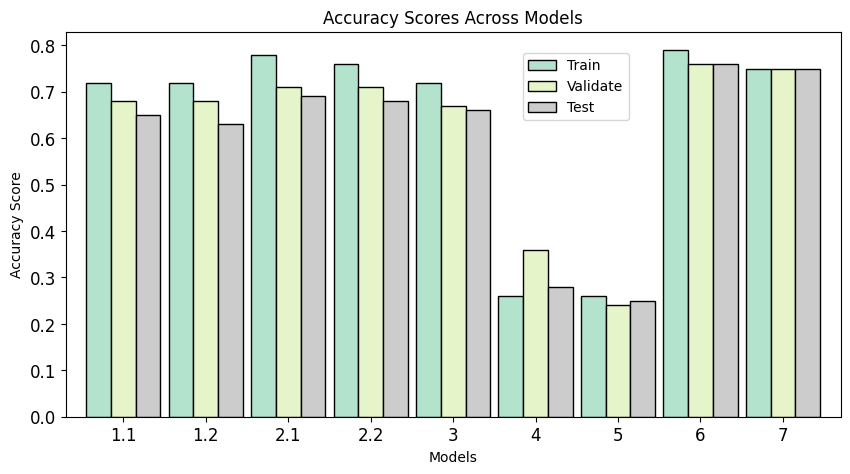

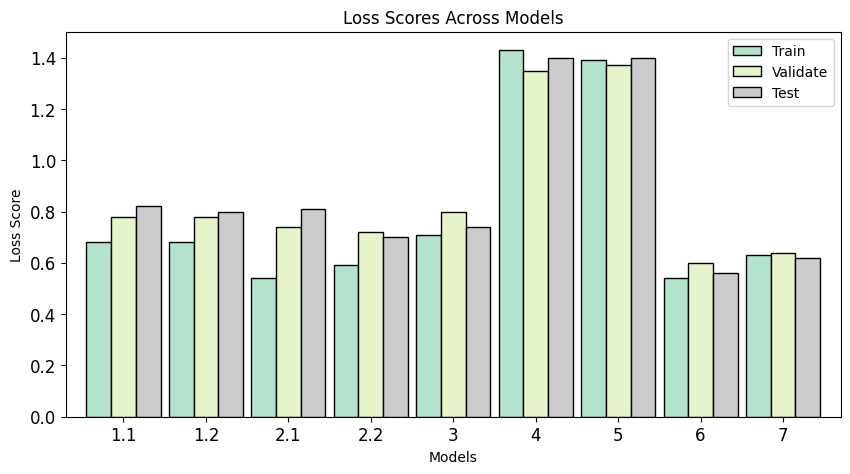

In [ ]:
# creating a dictionary containing model accuracies
dict_model_acc = {
    "Model": ["1.1", "1.2", "2.1", "2.2", "3", "4", "5", "6", "7"],
    "Train": [0.72, 0.72, 0.78, 0.76, 0.72, 0.26, 0.26, 0.79, 0.75],
    "Validate": [0.68, 0.68, 0.71, 0.71, 0.67, 0.36, 0.24, 0.76, 0.75],
    "Test": [0.65, 0.63, 0.69, 0.68, 0.66, 0.28, 0.25, 0.76, 0.75]}

# converting dictionary to dataframe
df_model_acc = pd.DataFrame.from_dict(dict_model_acc)


# plotting accuracy scores for all models
df_model_acc.groupby("Model", sort=False).mean().plot(kind='bar', figsize=(10,5),
                            title="Accuracy Scores Across Models",
                            ylabel="Accuracy Score", xlabel="Models", rot=0, fontsize=12, width=0.9, colormap="Pastel2",
                            edgecolor='black')
plt.legend(loc=(.59, 0.77))
plt.show()


# creating a dictionary containing model loss
dict_model_loss = {
    "Model": ["1.1", "1.2", "2.1", "2.2", "3", "4", "5", "6", "7"],
    "Train": [0.68, 0.68, 0.54, 0.59, 0.71, 1.43, 1.39, 0.54, 0.63],
    "Validate": [0.78, 0.78, 0.74, 0.72, 0.80, 1.35, 1.37, 0.60, 0.64],
    "Test": [0.82, 0.80, 0.81, 0.70, 0.74, 1.40, 1.40, 0.56, 0.62]}

# converting dictionary to dataframe
df_model_loss = pd.DataFrame.from_dict(dict_model_loss)

# plotting loss scores for all models
df_model_loss.groupby("Model", sort=False).mean().plot(kind='bar', figsize=(10,5),
                            title="Loss Scores Across Models",
                            ylabel="Loss Score", xlabel="Models", rot=0, fontsize=12, width=0.9, colormap="Pastel2",
                            edgecolor='black')
plt.show()

**Observations and Insights:**

The above graphs perfectly depict the overfitting that occurs in Models 1.1, 1.2, 2.1, 2.2, and 3, with accuracy scores declining in steps as we move from training, to validation, and on to test data. The opposite is true for the loss scores. The graphs also show the total dysfunction of Models 4 and 5, with very low accuracy and very high error scores. It is also clear from the graphs that Models 6 and 7 are the most consistent, most generalizable models, and that a final decision regarding a deployable model should be made between those two options.

In deciding between Models 6 and 7, it is useful to revisit the accuracy and loss curves for the two models.

#### **Accuracy and loss curves for Model 6:**
<table><tr>
<td> <img src="Accuracy_Model_6.png" alt="Drawing" style="width: 600px;"/> </td>
<td> <img src="Loss_Model_6.png" alt="Drawing" style="width: 600px;"/> </td>
</tr></table>

#### **Accuracy and loss curves for Model 7:**

<table><tr>
<td> <img src="Accuracy_Patience_15.png" alt="Drawing" style="width: 600px;"/> </td>
<td> <img src="Loss_Patience_15.png" alt="Drawing" style="width: 600px;"/> </td>
</tr></table>

While the accuracy and loss curves for the two models both stabilize by epoch 20-25, there is no gap between accuracy and loss curves for Model 7, while a slight gap does exist for Model 6. The accuracy and loss scores are all individually better for Model 6 (higher accuracy and lower loss), but when viewed together, the spread within the two scores is larger for Model 6, while it is virtually nonexistent in Model 7. It is difficult to justify deploying a slightly overfitting model when a slightly less accurate but more generalizable model is available. Model 7 will be our final model.










### **Plotting the Confusion Matrix for Model 7**

Found 128 images belonging to 4 classes.
4/4 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.60      0.66      0.63        32
           2       0.71      0.75      0.73        32
           3       0.96      0.81      0.88        32

    accuracy                           0.75       128
   macro avg       0.76      0.75      0.75       128
weighted avg       0.76      0.75      0.75       128



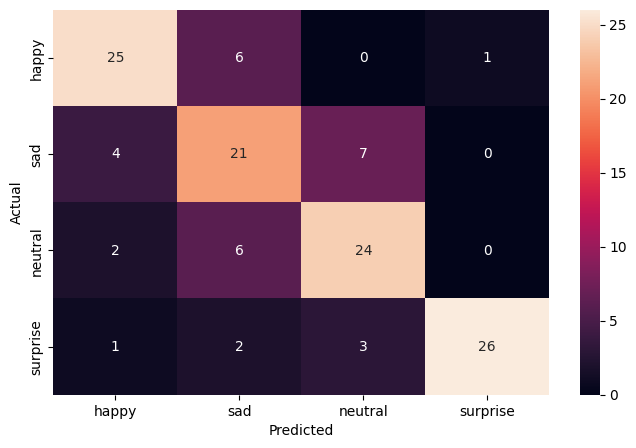

In [ ]:
test_set = datagen_test_grayscale.flow_from_directory(dir_test,
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = 128,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              seed = 42,
                                              shuffle = False)

test_images, test_labels = next(test_set)

pred = model_7.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using the confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


**Observations and Insights:**<br>
* As noted above, our final model achieves an accuracy score of 0.75 on the test images. The model correctly predicted 96 of 128 images.
* The choice to prioritize precision (TP/(TP+FP)) or recall (TP/(TP+FN)) depends entirely on the model's end use. If the stakes are high, and false negatives should be avoided at all costs, than recall is more important. If reducing the number of false positives is more important, than precision is the better choice. In the case of our model, no trade-off is necessary, with precision and recall scores essentially the same (precision = 0.76, recall = 0.75, F1 = 0.75).
* As previewed during the data visualization phase of the project, the 'happy' and 'surprise' images seemed to have the most unique characteristics, and this hypothesis appears to have played out in the classification report and confusion matrix. Happy and surprise have the highest precision and recall scores (and consequently, F1 scores) of the 4 classes.
* Additionally, 'sad' and 'neutral' images were in fact more likely to be confused with one another, as discussed during the data visualization phase. When the model misclassified a sad image, it was most likely to be mistaken for a neutral image, and vice versa.
* Any concern about a slightly skewed class distribution can be put to rest. As previewed, the surprise images, which were outnumbered in the training and validation data, were unique enough to identify correctly despite representing a smaller proportion of training images. It is possible that our earlier finding re: elevated average pixel values for surprise images has played a role, along with the unique characteristics of surprise images, including open mouths and wide open eyes.
* As discussed during the data visualization phase, now in the context of the confusion matrix, it should be pointed out once again that the term "accuracy" can be misleading. There are training, validation, and test images of smiling people that are labeled as "sad", while there are images of frowning people labeled as "happy", etc. If the model classifies a test image as "sad" even though the person is smiling, and in fact the test image is incorrectly classified as "sad", making the prediction accurate, should we really consider that as accurate? Or would the accurate prediction be when the model overrules the misclassified test image and, from a human's perspective, accurately classifies the image as "happy"? For this reason, the test scores and confusion matrix should be taken with a grain of salt.
* Similarly, there is a test image that does not contain a face at all. As there are similar images across all four classes within the training data, a correct prediction of the empty test image would seem to be pure chance. Should an accurate prediction in this case really increase the model's perceived accuracy? Should an incorrect prediction of an empty test image really lower the model's perceived accuracy? It seems that any model that correctly predicts all 128 test images benefited from some degree of luck. Again, these final scores should be viewed with some degree of skepticism, but that skepticism would be similar across all models.

### **Visualizing Images: Actual Class Label vs Predicted Class Label**

1/1 [==============================] - 0s 292ms/step


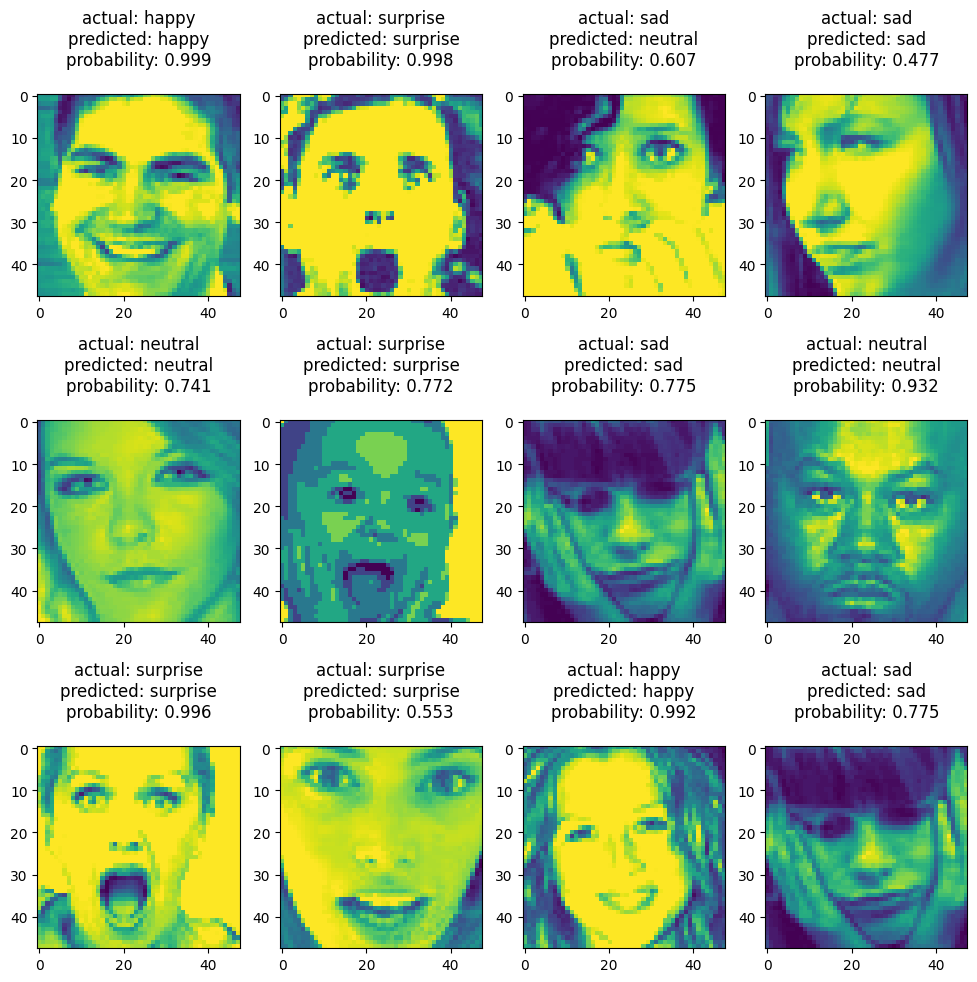

In [ ]:
# Making predictions on the test data
y_pred_test = model_7.predict(test_set)

# Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis = 1)

# Calculating the probability of the predicted class
y_pred_test_max_probas = np.max(y_pred_test, axis = 1)

classes = ['happy', 'sad', 'neutral', 'surprise']

rows = 3

cols = 4

fig = plt.figure(figsize = (12, 12))

for i in range(cols):

    for j in range(rows):
        random_index = np.random.randint(0, len(test_labels))       # generating random integer

        ax = fig.add_subplot(rows, cols, i * rows + j + 1)

        ax.imshow(test_images[random_index, :])                     # selecting random test image

        pred_label = classes[y_pred_test_classes[random_index]]     # predicted label of selected image

        pred_proba = y_pred_test_max_probas[random_index]           # probability associated with model's prediction

        true_label = test_labels[random_index]                      # actual class label of selected image

        if true_label[0] == 1:                                      # converting array to class labels
            true_label = "happy"
        elif true_label[1] == 1:
            true_label = "sad"
        elif true_label[2] == 1:
            true_label = "neutral"
        else:
            true_label = "surprise"

        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba))

plt.gray()
plt.show()

**Observations and Insights:**<br>
* As predicted during the data visualization phase of the project, and confirmed via the confusion matrix, we again see that "sad" and "neutral" images are the most likely to be confused for one another. All three of the errors made by our model on the 12 random images above were of the sad/neutral variety. While the model was quite confident in one case (0.90), it was not at all confident in the other two incorrect predictions (0.41 and 0.53).
* As theorized earlier, the predictions above also seem to point to the characteristic "surprise" face (wide open mouth and eyes) as being relatively easy for the model to learn, despite the training data being somewhat imbalanced against "surprise" images. Images that are clearly "surprise" to the human eye are all correctly predicted by the model with very high confidence (0.99+).
* The model's accuracy on the 12 random images above (9 correct out of 12) is consistent with its training, validation, and test accuracy: 0.75.

## **Conclusion:**
Over the course of this project, we have thoroughly explored the ins and outs of the given data through visualization and analysis, developed 9 different convolutional neural networks, and drawn many insights from our observations along the way. Though much has already been discussed as we have gone along, a summary of the problem, our findings, and recommendations for implementation can be found below.

# <span style="color:navy">Problem and Solution Summary</span>

As noted at the outset of this project, someone's facial expression can be a powerful window into their true feelings, and as such, can be used as a highly-effective proxy for sentiment. Emotion AI (affective computing) attempts to leverage this proxy by detecting and processing facial expression, through neural networks, in an effort to successfully interpret human emotion and respond appropriately. Developing models that can accurately detect facial emotion is therefore an important driver of advancement in the realm of artificial intelligence and emotionally intelligent machines.

The objective of this project was to utilize deep learning techniques to create a computer vision model that can accurately detect and interpret facial emotions. This model should be capable of performing multi-class classification on images containing one of four facial expressions: happy, sad, neutral, and surprise. As discussed earlier, convolutional neural networks are currently the most effective algorithmic tool available for processing images, so our solution takes the form of a CNN.

Over the course of this project, 9 CNNs were developed (with colormode variations RGB and grayscale). Before model development, the data was visually analyzed and then augmented based on that analysis, the specifics of which depended on the individual model being developed. Models ranged from simple, baseline models to much more complex architectures, including transfer learning models. Ultimately, our final model was chosen for its relatively high accuracy (compared to the other models) and, more importantly, because it is highly generalizable. A tabular and graphical summary of model performance is below.

|  | Parameters | Train Loss | Train Accuracy | Val Loss | Val Accuracy | Test Loss | Test Accuracy |
| --- | --- | --- | --- | --- | --- | --- | --- |
| **Model 1.1**: Baseline Grayscale | 605,060 | 0.68 | 0.72 | 0.78 | 0.68 | 0.82 | 0.65 |
| **Model 1.2**: Baseline RGB | 605,572 | 0.68 | 0.72 | 0.78 | 0.68 | 0.80 | 0.63 |
| **Model 2.1**: 2nd Gen Grayscale | 455,780 | 0.54 | 0.78 | 0.74 | 0.71 | 0.81 | 0.69 |
| **Model 2.2**: 2nd Gen RGB | 457,828 | 0.59 | 0.76 | 0.72 | 0.71 | 0.70| 0.68 |
| **Model 3**: VGG16 | 14,714,688 | 0.71 | 0.72 | 0.80 | 0.67 | 0.74 | 0.66 |
| **Model 4**: ResNet V2 | 42,658,176 | 1.43 | 0.26 | 1.35 | 0.36 | 1.40 | 0.28 |
| **Model 5**: EfficientNet | 8,769,374 | 1.39 | 0.26 | 1.37 | 0.24 | 1.40 | 0.25 |
| **Model 6**: Milestone 1 | 2,119,172| 0.54 | 0.79 | 0.60 | 0.76 | 0.56 | 0.76 |
| **Model 7**: Final Model | 1,808,708 | 0.63 | 0.75 | 0.64 | 0.75 | 0.62 | 0.75 |

<br>
<td> <img src="model_summary_1.png" alt="Drawing" style="width: 750;"/> </td>
<br>

The architecture for our final model (Model 7) is more complex than our baseline models, but not nearly as complex as the VGG16, ResNet, or EfficientNet transfer learning models that were developed. Model 7 consists of three fairly standard convolutional blocks with relu activation, BatchNormalization, MaxPooling, and Dropout layers. The critical block that conquered overfitting and removed the generalization gap was a regularization block consisting of BatchNormalization layers and a convolutional layer with L2 regularization. Two additional key features of Model 7 are heavy usage of BatchNormalization throughout the architecture, as well as the addition of GaussianNoise between the two fully-connected layers.

The combination of the above features delivered a model with training, validation, and test accuracy of 0.75. While 75% accuracy may not seem particularly high, correctly classifying the FER2013 dataset, from which it appears our data was drawn, is extremely challenging, with human-level accuracy standing at just 65%. So Model 7 may be more accurate at classifying our dataset than a human, but whether or not 75% accuracy is ultimately high enough for deployment depends entirely on the business use and the cost that would be incurred in any efforts made to improve model performance.

For example, if this computer vision model is being developed to create photo filters for a phone application, perhaps an accuracy of 0.75 is sufficient. It is better than random guessing (0.25) and also better than a human being (0.65). As the stakes in this instance are pretty low, 75% accuracy would likely suffice for model deployment, particularly if 75% accuracy is higher than that of similar phone applications on the market. If, on the other hand, this computer vision model is being developed for use in some sort of life or death medical situation, 75% accuracy may be too low, and improvement might justify the additional expenses incurred.


# <span style="color:navy">Recommendations for Implementation</span>

The spectrum of possible use cases for Emotion AI in general, and facial emotion recognition technology in particular, is so broad that it is difficult to give a general set of recommendations for implementation. It very much comes down to the specific use case for each business, organization, or government.

The first big question to answer is the following: will the collection of this private, emotional data require consent (or opting in) from the individual whose facial emotions are being recorded and analyzed? If consent is required and granted, that makes it easier from a business perspective, as long as the consent given by the individual was based on truthful, transparent terms, and the business lives up to its end of the agreement. If, however, a computer vision model will be used to extract data from individuals without their consent or knowledge, that puts a business, organization, or government in a much more vulnerable position, with huge potential for a privacy rights related backlash and consequent loss of reputation, brand loyalty, market share, legitimacy, etc.

Model 7, with an accuracy of 75 percent, should be considered deployable in some circumstances under certain conditions, and should absolutely not be considered deployable in other circumstances. For example, if a company is analyzing someone's facial reaction to an advertisement (with their permission) in an effort to better target future advertisement campaigns or decide what customer demographic should receive a particular coupon in the mail, than 75 percent accuracy (again, with permission) is perfectly reasonable. If, on the other hand, the intention is to deploy this computer vision model in a situation that can materially impact someone's life in a serious way (denying a loan, denying a job, deciding guilt or innocence in a court of law, student performance in school, etc.), than 75 percent accuracy is nowhere near what it would need to be. On top of that, we should be giving serious thought as to whether or not even the most accurate computer vision model should be deployed in those situations anyways.

For the sake of this exercise, let us assume that a business is interested in our computer vision model to better understand how their advertising campaigns are perceived by current and potential customers. Some key recommendations would be:
* Determine whether or not a computer vision model is even needed in this circumstance, or if there is a less intrusive way to obtain the desired data that may be equally effective.
* Revisit the training dataset and determine whether or not it is a representative enough sample for our purposes. If it is not representative enough, or is simply too small, retrain the model on the appropriate data rather than deploy a model with known biases.
* Gain informed consent grounded in transparency.
* Ensure that the model will only be used in the context that was agreed to by the individual, and that it will not be sold to a third party or used in anyway that could negatively impact the individual.

Assuming the above to be true, stakeholder actionables could include:
* Ensure ethical standards are being monitored and maintained in terms of data privacy.
* Monitor the return on advertisement spending to determine if our computer vision model is having an impact on the bottom line.
* Consider other use cases for computer vision models, like in store cameras that can assist in identifying what customers might be interested in purchasing and alerting a salesperson who can then act on that information. This obviously moves away from informed consent, so that would need to be taken into consideration. Would signs indicating that cameras were recording be sufficient? Is it worth a potential privacy-backlash or lawsuit if data is mishandled or used in new ways down the road?

Associated costs include:
* Depending on the size of the company, anywhere from 2-12% of sales revenue is generally allocated to marketing. A larger company would likely not have much difficulty absorbing the cost of deploying a computer vision model if management believed the investment would pay for itself (and then some) with increased sales.
* A smaller company, with a correspondingly smaller marketing budget, might have a more difficult time funding the deployment of a computer vision model, however, in many ways, it has more to gain than the larger company. Smaller businesses need any advantage they can get, and in this case, a bit of investment up front could potentially save them a large chunk of a marketing budget wasted advertising the wrong products to the wrong (potential) customers.  
* A serious cost to consider when deploying a computer vision model like this is what happens in the case of a data leak, or if the data is mishandled in some way resulting in a lawsuit or penalties of some kind. For small and large businesses alike, a mistake like that could be fatal.

The upside to deploying Emotion AI technology like our computer vision model is huge:
* Insights generated by Emotion AI data could help a business improve their advertising/marketing strategies, learn which products or messaging most resonates with existing and potential customers, and use this knowledge to better target their marketing campaigns.
* Improved marketing can lead to increased customer satisfaction and long-term brand loyalty. A business that can provide a customer with the right product at the right time in a hyper-personalized manner is more likely to keep that customer's business in the future.

Key risks and challenges include several issues already discussed:
* The first risk involves the principle assumption upon which the entire facial emotion detection/recognition model is built: that smiling people are happy, frowning people are sad, etc. This is obviously not always the case. Expressions vary from person to person, from culture to culture, and even for the same person from one moment to the next. People can be smiling yet be feeling no emotion. People can be happy or sad yet have a neutral face. Someone could be feeling a compound emotion, like being happily surprised or sadly surprised. Our model may have an accuracy of 75%, but that is only with respect to preexisting class labels. Our model may identify a potential customer viewing our marketing as smiling, but it does not necessarily follow that the person is happy or enjoying the advertisement. In essence, the model may work, but the science behind the assumptions may not.
* Improper handling of deeply personal data could be catastrophic for a business of any size, but particularly a small business. Ethical guidelines pertaining to the collection and use of this data must be put into place and monitored to ensure data privacy is maintained above all else.
* Emotion AI, and AI in general, is developing so quickly that governments and regulators are unable to keep pace. It is possible that in the short- to medium-term, once regulators are able to better assess the situation and gain consensus on any legislation, Emotion AI technology may be subject to regulations, including computer vision models such as the one we have developed. If this occurs before our model is deployed and insights are gained, it would be a wasted investment.
* If there is a massive data breach in the future related to Emotion AI, whether it be at a large company/organization or a government agency, it could generate such bad publicity and public sentiment that any business utilizing or at all associated with the technology could face a data privacy related backlash.

Potential further action:
* If the company is large enough to have government affairs personnel, the company should build and maintain relationships with government agencies and officials that are likely to be responsible for future legislation that may impact Emotion AI and its use by businesses and organizations.  
* Regarding the computer vision model we have developed, it is important to know where the training images came from. How were they sourced? Did the subjects in the photos grant permission for their images to be used in this way? It seems unlikely to be the case, as many training images have watermarks and appear to be scraped from the Internet. It would be more ethical to procure or develop a set of training images that are in line with the ethical guidelines developed by the company. This would obviously entail revising the model based on new training data, but safeguarding the privacy of the individuals in the photos should be paramount. A positive impact on the bottom line is important, but before all else, do no harm. Emotion AI is likely to be a controversial topic in the years ahead, and it makes better business sense to see what is coming down the road and act now in a way that protects everyone involved.
